In [3]:
import h5py
import shutil
import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from scipy import stats
from itertools import combinations
from scipy.stats import kurtosis
from scipy.spatial import distance

from modules.makeParams import *
from modules.RejectionProtocols import *
from modules.postAnalysis import *
archivedPath = os.path.join("..","CGresults","may13_22")#folder is outside of CGProjectpub
localPath = os.getcwd()
localPath

'C:\\Users\\ddopp\\source\\repos\\CGProjectpub'

In [ ]:
h.nrn_load_dll(os.path.join("modFiles","nrnmech.dll"))

1.0

In [58]:
LV3Params = np.array(pd.read_pickle(os.path.join("output","LV3","passParamsRepeat.pkl")))

In [68]:
LV3Params = np.array(pd.read_pickle(r'C:\Users\ddopp\Desktop\passParamsRepeat.pkl'))

In [69]:
start = 76
pd.DataFrame(LV3Params[:,start:start+5])

,0,1,2,3,4
0,0.000079,0.000087,0.000088,0.000110,0.000112
1,0.001056,0.000264,0.000322,0.001382,0.001377
2,0.004849,0.004766,0.003508,0.001645,0.001021
3,0.001096,0.001215,0.001991,0.001680,0.001645
4,0.000735,0.000980,0.000841,0.001192,0.000243
5,0.000319,0.000175,0.000172,0.000318,0.000239
6,0.000123,0.000117,0.000084,0.000117,0.000116
7,0.000242,0.000258,0.000282,0.000196,0.000208
8,0.000124,0.000072,0.000090,0.000087,0.000115
9,0.000117,0.000307,0.000122,0.000179,0.000224


# check how many cells passed each stage

In [131]:
#check the number tested according to voltage traces and parameter shapes:


LV1in = np.array(pd.read_pickle(os.path.join("output","LV1","Vsoma.pkl")))
LV3in = np.array(pd.read_pickle(os.path.join("output","LV3","passParamsRepeat.pkl")))
LV2in = np.array(pd.read_pickle(os.path.join("input","LV2", "passParams.pkl")))
LV2out = np.array(pd.read_pickle(os.path.join("output","LV2","passParams.pkl")))
LV3 = np.array(pd.read_pickle(os.path.join("output","LV3","VsomaControl.pkl")))


In [24]:

LV3passParamsAVG = np.array(pd.read_pickle(os.path.join("output","LV3","Avg","passParamsRepeat.pkl")))
codedAVG = np.loadtxt(os.path.join("output","LV3","AVG","LV3RejectionResults.txt"))
passIdxsAVG,failIdxsAVG,allIdxsAVG = getPassIdxs(codedAVG)
allAVGnetspassIdxs = getEveryFirstNet(allIdxsAVG)
passParamsAVGIDXs = np.where(allAVGnetspassIdxs==1)[0]


LV3passParams = np.array(pd.read_pickle(os.path.join("output","LV3","passParamsRepeat.pkl")))#the set used to make the average params
coded = np.loadtxt(os.path.join("output","LV3","LV3RejectionResults.txt"))
passIdxs,failIdxs,allIdxs = getPassIdxs(coded)
passParams = getEveryFirstNet(LV3passParams[:,passIdxs])


LV2numTested = (LV2in.shape)[1]/16
LV3AVGdpassed = (LV3passParamsAVG.shape)[1]/5
LV3inputnum = (LV3in.shape)[1]
print('starting with %d cells, %d passed LV1\n%d cells passed LV2 which forms %d networks\nof which %d networks passed  ' %(LV1in.shape[0],LV2in.shape[1],(LV2out.shape)[1],(LV2out.shape)[1]/5,(passParams.shape)[1]/5))
print('from the %d networks, an averaged network was formed for each, of which %d passed' %((passParams.shape)[1]/5,passParamsAVGIDXs.shape[0]/5))

starting with 6000 cells, 4541 passed LV1
1958 cells passed LV2 which forms 391 networks
of which 251 networks passed  
from the 251 networks, an averaged network was formed for each, of which 213 passed


### save unique parameter sets for Rstudio plotting

In [ ]:

LV3passParams = np.array(pd.read_pickle(os.path.join("output","LV3","passParamsRepeat.pkl")))#the set used to make the average params
coded = np.loadtxt(os.path.join("output","LV3","LV3RejectionResults.txt"))
passIdxs,failIdxs,allIdxs = getPassIdxs(coded)
passParams = getEveryFirstNet(LV3passParams[:,passIdxs])
with h5py.File('LV3PassParams.hdf5', 'w') as f:
    dset = f.create_dataset("default", data = passParams)

##  plot correlograms

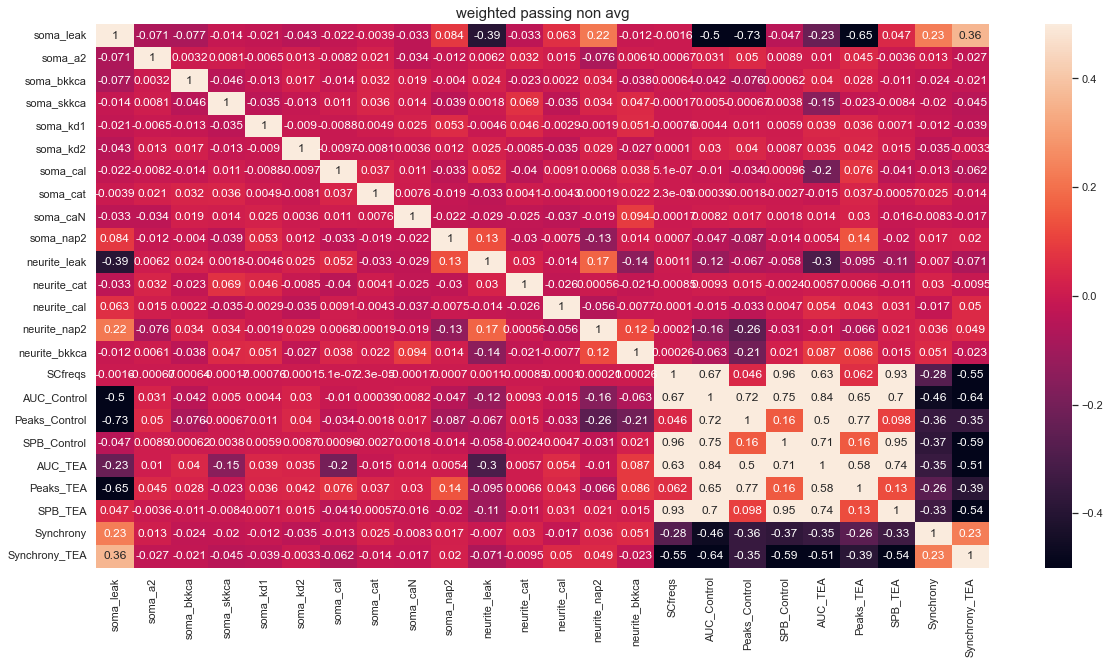

In [81]:
######################################
#scfreqs = np.loadtxt(os.path.join("output","LV3","Avg","SCfreqs"))
#RejectionResults = np.loadtxt(os.path.join("output","LV3","Avg","LV3RejectionRaw.txt"))
#LV3passParams = np.array(pd.read_pickle(os.path.join("output","LV3","Avg","passParamsRepeat.pkl")))
#coded = np.loadtxt(os.path.join("output","LV3","Avg","LV3RejectionResults.txt"))

scfreqs = np.loadtxt(os.path.join("output","LV3","SCfreqs"))
RejectionResults = np.loadtxt(os.path.join("output","LV3","LV3RejectionRaw.txt"))
LV3passParams = np.array(pd.read_pickle(os.path.join("output","LV3","passParamsRepeat.pkl")))#the set used to make the average params
coded = np.loadtxt(os.path.join("output","LV3","LV3RejectionResults.txt"))
######################################
#choose weighted or un weighted. note that unweighted will not give accurate results for SCfreqs or rejectionresults since it is only grabbing the nets which passed at 16 hz
passIdxs,failIdxs,allIdxs = getPassIdxs(coded)
passI = passIdxs#weighted
#passI = getEveryFirstNet(passIdxs).astype(int)#nonweighted
###############################
params = LV3passParams[:,passI]
scfreqs = scfreqs[passI]
RejectionResults = RejectionResults[:,passI]

args = [params,scfreqs.reshape(1,-1),RejectionResults]
Params = np.concatenate(args,axis=0)
myList = fullParamsList() + ['SCfreqs'] + LV3CritList()

title = 'weighted passing non avg'
plotCorrelogram(Params,myList,title)
plt.savefig(title+'.png',dpi=500)
plt.show()

In [89]:
np.mean(params[3,:])

0.0014164008

In [80]:
LV3CritList()

['AUC_Control',
 'Peaks_Control',
 'SPB_Control',
 'AUC_TEA',
 'Peaks_TEA',
 'SPB_TEA',
 'Synchrony',
 'Synchrony_TEA']

In [87]:
Fparams = LV3passParams[:,failIdxs]

In [90]:
np.mean(Fparams[3,:])

0.0014590683

In [83]:
RejectionResults = np.loadtxt(os.path.join("output","LV3","LV3RejectionRaw.txt"))

In [77]:
######################################
scfreqs = np.loadtxt(os.path.join("output","LV3","Avg","SCfreqs"))
RejectionResults = np.loadtxt(os.path.join("output","LV3","Avg","LV3RejectionRaw.txt"))
LV3passParams = np.array(pd.read_pickle(os.path.join("output","LV3","Avg","passParamsRepeat.pkl")))
coded = np.loadtxt(os.path.join("output","LV3","Avg","LV3RejectionResults.txt"))

######################################
#choose weighted or un weighted. note that unweighted will not give accurate results for SCfreqs or rejectionresults since it is only grabbing the nets which passed at 16 hz
passIdxs,failIdxs,allIdxs = getPassIdxs(coded)
passI = passIdxs#weighted
#passI = getEveryFirstNet(passIdxs).astype(int)#nonweighted
###############################
params = LV3passParams[:,passI]
scfreqs = scfreqs[passI]
RejectionResults = RejectionResults[:,passI]

args = [params,scfreqs.reshape(1,-1),RejectionResults]
ParamsAVG = np.concatenate(args,axis=0)
myList = fullParamsList() + ['SCfreqs'] + LV3CritList()

CorrsDiff = abs(np.corrcoef(ParamsAVG)) - abs(np.corrcoef(Params))#assuming Params is the correlation matrix used to make the non averaged plots

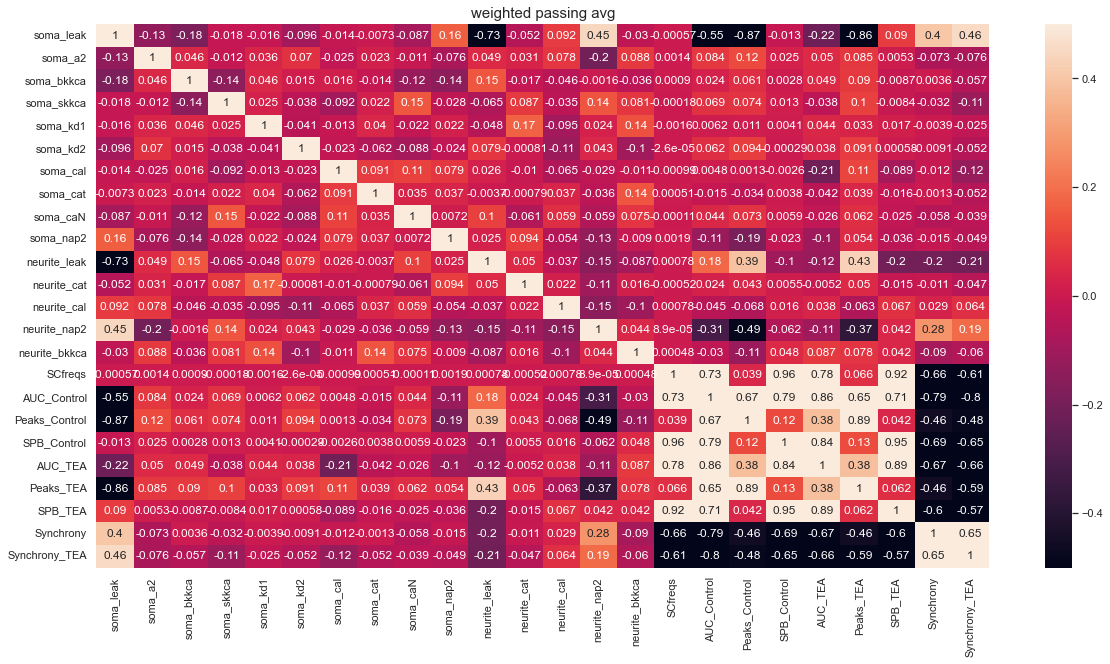

In [72]:
plotCorrelogram(ParamsAVG,myList,'weighted passing avg')
plt.savefig('weighted passing avg.png',dpi=500)
plt.show()

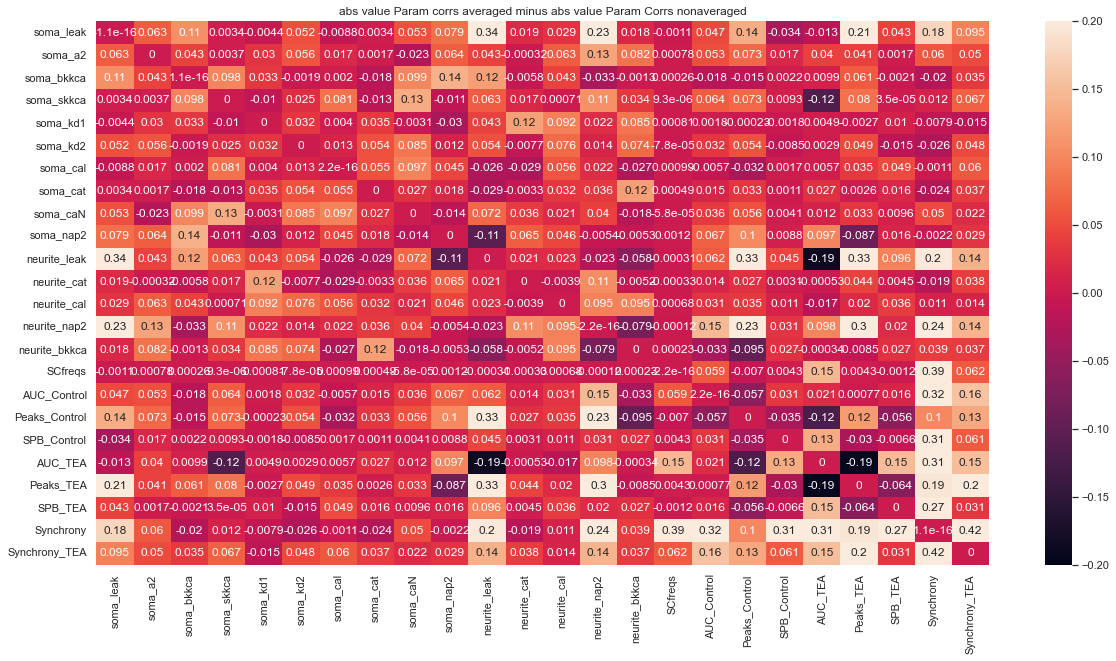

In [78]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(CorrsDiff,xticklabels=myList,yticklabels = myList,vmin=-0.2,vmax=0.2,annot=True)
plt.title('abs value Param corrs averaged minus abs value Param Corrs nonaveraged')
plt.savefig('weighted passing diff.png')
plt.show()

### find the averaged networks and unaverage them

In [46]:
#get the averaged networks which pass
LV3passParamsAVG = np.array(pd.read_pickle(os.path.join("output","LV3","Avg","passParamsRepeat.pkl")))
codedAVG = np.loadtxt(os.path.join("output","LV3","Avg","LV3RejectionResults.txt"))
passIdxsAVG,failIdxsAVG,allIdxsAVG = getPassIdxs(codedAVG)
passParamsAVG = getEveryFirstNet(LV3passParamsAVG[:,passIdxsAVG])


#get the nonaveraged networks which pass
LV3passParams = np.array(pd.read_pickle(os.path.join("output","LV3","passParamsRepeat.pkl")))#the set used to make the average params
coded = np.loadtxt(os.path.join("output","LV3","LV3RejectionResults.txt"))
passIdxs,failIdxs,allIdxs = getPassIdxs(coded)
passParams = getEveryFirstNet(LV3passParams[:,passIdxs])

#get the averaged networks which fail
failParamsAVG = getEveryFirstNet(LV3passParamsAVG[:,failIdxsAVG])
#get the nonaveraged networks which fail
failParams = getEveryFirstNet(LV3passParams[:,failIdxs])
#compare the ranges of the failing networks with the nonfailing networks

allIdxsAVG#this is the 1 or 0 for every network at every frequency, 24160 recordings that form 302 networks, 1 if passed, 0 if failed
allAVGnetspassIdxs = getEveryFirstNet(allIdxsAVG)#1510 forming 302 networks
p = np.where(allAVGnetspassIdxs==1)[0]#1405 forming 281 networks
f =  np.where(allAVGnetspassIdxs!=1)[0]#105 forming 21 networks
t1 = passParams[:,p]# un averaged networks corresponding to the averaged networks that pass
t2 = passParams[:,f] # un averaged networks corresponding to the averaged networks that fail

In [47]:
LV3passParams = np.array(pd.read_pickle(os.path.join("output","LV3","passParamsRepeat.pkl")))#the set used to make the average params
coded = np.loadtxt(os.path.join("output","LV3","LV3RejectionResults.txt"))
passIdxs,failIdxs,allIdxs = getPassIdxs(coded)
passParams = getEveryFirstNet(LV3passParams[:,passIdxs])
passParams.shape

(15, 1255)

## kurtosis

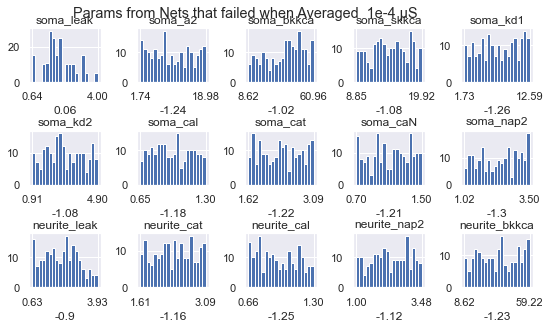

In [73]:
#t1 is the averaged networks that passed, but unaveraged
#t2 is the averaged networks that failed, but unaveraged
from scipy.stats import skew
t1Kurts = [kurtosis(t1[i,:],bias=False) for i in range((t1.shape)[0])]
t1Kurts = np.round(t1Kurts,2)
t1Skews = [skew(t1[i,:]) for i in range((t1.shape)[0])]
t1Skews = np.round(t1Skews,2)

t2Kurts = [kurtosis(t2[i,:],bias=False) for i in range((t2.shape)[0])]
t2Kurts = np.round(t2Kurts,2)
t2Skews = [skew(t2[i,:]) for i in range((t2.shape)[0])]
t2Skews = np.round(t2Skews,2)
plotDistributions(t2,fullParamsList(),20,'Params from Nets that failed when Averaged  ',t2Kurts)
plt.savefig('params from nets that failed when averaged')

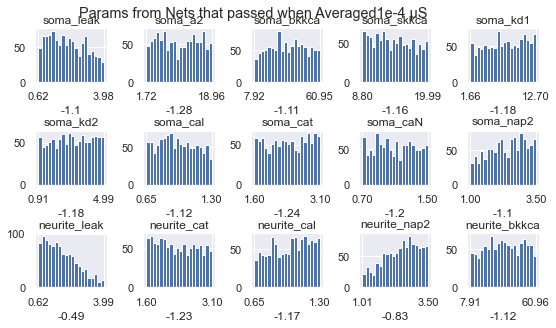

In [74]:
t1Kurts = [kurtosis(t1[i,:],bias=True) for i in range((t1.shape)[0])]
t1Kurts = np.round(t1Kurts,2)
t1Skews = [skew(t1[i,:]) for i in range((t1.shape)[0])]
t1Skews = np.round(t1Skews,2)

plotDistributions(t1,fullParamsList(),20,' Params from Nets that passed when Averaged',t1Kurts)
plt.savefig('params from nets that passed when averaged')

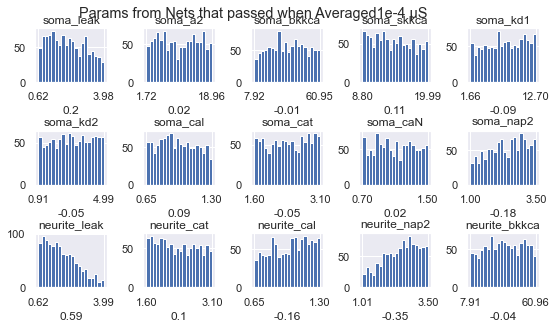

In [50]:
plotDistributions(t1,fullParamsList(),20,' Params from Nets that passed when Averaged',t1Skews)

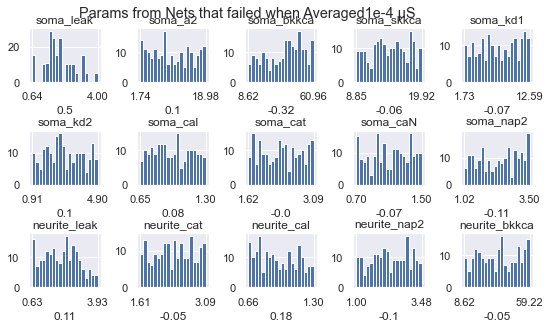

In [75]:
plotDistributions(t2,fullParamsList(),20,' Params from Nets that failed when Averaged',t2Skews)

In [52]:
AvgFailKurt = np.mean(t2Kurts)
AvgPassKurt = np.mean(t1Kurts)
AvgFailSkew = np.mean(t2Skews)
AvgPassSkew = np.mean(t1Skews)
print('Failing:\nAvg Kurt = {0:>15.4}\nAvg Skew = {1:>15.4}\n\nPassing:\nAvg Kurt = {2:>15.4}\nAvg Skew = {3:>17.4}'.format(AvgFailKurt,AvgFailSkew,AvgPassKurt,AvgPassSkew))

Failing:
Avg Kurt =          -1.079
Avg Skew =           0.016

Passing:
Avg Kurt =          -1.101
Avg Skew =           0.01333


In [53]:
DistMetricFail = abs(t2Kurts) + abs(t2Skews)
DistMetricPass = abs(t1Kurts) + abs(t1Skews)

In [62]:
DistMetricFail

array([0.56, 1.34, 1.34, 1.14, 1.33, 1.18, 1.26, 1.22, 1.28, 1.41, 1.01,
       1.21, 1.43, 1.22, 1.28])

In [63]:
print('skew/kurt measurement for failing = %.6f\nskew/kurt measurement for passing = %.6f' %(np.mean(DistMetricFail),np.mean(DistMetricPass)))
stats.ttest_ind(DistMetricFail, DistMetricPass, equal_var=False)

skew/kurt measurement for failing = 1.214000
skew/kurt measurement for passing = 1.238000


Ttest_indResult(statistic=-0.4163469682084544, pvalue=0.6821901545922873)

## euclidean distance between LCs in a network

In [55]:
# get a list of LC1-2 avg, LC3, and LC3-4 avg:
LV3passParams = np.array(pd.read_pickle(os.path.join("output","LV3","passParamsRepeat.pkl")))#the set used to make the average params
coded = np.loadtxt(os.path.join("output","LV3","LV3RejectionResults.txt"))
passIdxs,failIdxs,allIdxs = getPassIdxs(coded)
LV3passParamsUnique = getEveryFirstNet(LV3passParams[:,passIdxs])
LV3passParamsUnique.shape

(15, 1255)

In [56]:
Dist_12_3,Dist_45_3,Dist_1_2,Dist_4_5 = [],[],[],[]
D13,D23,D43,D53 = [],[],[],[]
for i in range(0,LV3passParamsUnique.shape[1],5):
    #get the cells
    LC1,LC2,LC3,LC4,LC5 = LV3passParamsUnique[:,i+0], LV3passParamsUnique[:,i+1],LV3passParamsUnique[:,i+2],LV3passParamsUnique[:,i+3],LV3passParamsUnique[:,i+4]
    #standardize if desired
    #LC1 = LC1/max(abs(LC1))
    #LC2 = LC2/max(abs(LC2))
    #LC3 = LC3/max(abs(LC3))
    #LC4 = LC4/max(abs(LC4))
    #LC5 = LC5/max(abs(LC5))
    #calc the euclidean distance for this network:
    Dist_1_3 = distance.euclidean(LC1,LC3)
    Dist_2_3 = distance.euclidean(LC2,LC3)
    D13.append(Dist_1_3)
    D23.append(Dist_2_3)
    #Dist_12_3.append((Dist_1_3 + Dist_2_3)/2)
    Dist_12_3.append(distance.euclidean((LC1+LC2)/2,LC3))
    
    Dist_4_3 = distance.euclidean(LC4,LC3)
    Dist_5_3 = distance.euclidean(LC5,LC3)
    D43.append(Dist_4_3)
    D53.append(Dist_5_3)
    #Dist_45_3.append((Dist_4_3 + Dist_5_3)/2)
    Dist_45_3.append(distance.euclidean((LC4+LC5)/2,LC3))
    
    Dist_1_2.append(distance.euclidean(LC1,LC2))
    Dist_4_5.append(distance.euclidean(LC4,LC5))
    

In [57]:
print('Dist_12_3 = {0:>10.6f}\nDist_45_3 = {1:>10.6f}\nDist_1_2 = {2:>11.6f}\nDist_4_5 = {3:>11.6f}'.format(np.mean(Dist_12_3),np.mean(Dist_45_3),np.mean(Dist_1_2),np.mean(Dist_4_5)))
print('\n\n')
print('Dist_1_3 = {0:>11.6f}\nDist_2_3 = {1:>11.6f}\nDist_4_3 = {2:>11.6f}\nDist_5_3 = {3:>11.6f}\nDist_1_2 = {4:>11.6f}\nDist_4_5 = {5:>11.6f}'.format(np.mean(D13),np.mean(D23),np.mean(D43),np.mean(D53),np.mean(Dist_1_2),np.mean(Dist_4_5)))

Dist_12_3 =   0.002466
Dist_45_3 =   0.002471
Dist_1_2 =    0.002893
Dist_4_5 =    0.002803



Dist_1_3 =    0.002910
Dist_2_3 =    0.002799
Dist_4_3 =    0.002788
Dist_5_3 =    0.002890
Dist_1_2 =    0.002893
Dist_4_5 =    0.002803


In [58]:
print('std LC12 and LC3 distance = ',np.std(Dist_12_3))
print('std LC1 LC2 distance = ',np.std(Dist_1_2))
print('p-value = ',stats.ttest_ind(Dist_12_3,Dist_1_2,equal_var=False)[1])

std LC12 and LC3 distance =  0.0010085030835252783
std LC1 LC2 distance =  0.001206393961787839
p-value =  2.0890563576817614e-05


In [59]:
print('std LC45 and LC3 distance = ',np.std(Dist_45_3))
print('std LC4 LC5 distance = ',np.std(Dist_4_5))
print('p-value = ',stats.ttest_ind(Dist_45_3,Dist_4_5,equal_var=False)[1])


std LC45 and LC3 distance =  0.0010318791121493626
std LC4 LC5 distance =  0.0012098624733734489
p-value =  0.0010099381096042024


In [60]:
stats.ttest_ind(Dist_4_5,Dist_45_3,equal_var=False)

Ttest_indResult(statistic=3.3077496088384697, pvalue=0.0010099381096042024)

In [19]:
Dist_X_3 = (np.mean(D13)+np.mean(D23)+np.mean(D43)+np.mean(D53))/4
Dist_LC12_LC45 = (np.mean(Dist_1_2) + np.mean(Dist_4_5))/2
print("average distance between LCs and LC3 is %.6f\nAverage distance between LCs coupled is %.6f" %(Dist_X_3,Dist_LC12_LC45))

average distance between LCs and LC3 is 0.001920
Average distance between LCs coupled is 0.001863


In [403]:
stats.ttest_ind(np.mean(np.concatenate([np.array(D13).reshape(-1,1),np.array(D23).reshape(-1,1),np.array(D43).reshape(-1,1),np.array(D53).reshape(-1,1)],axis=1),axis=0),np.mean(np.concatenate([np.array(Dist_1_2).reshape(-1,1),np.array(Dist_4_5).reshape(-1,1)],axis=1),axis=0))

Ttest_indResult(statistic=1.034187799535715, pvalue=0.3594730024173741)

# frequency and network ID

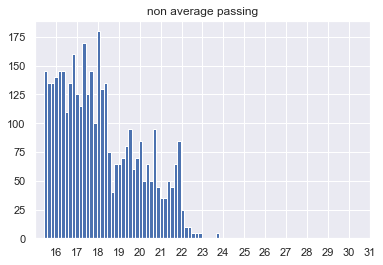

In [64]:
coded = np.loadtxt(os.path.join("output","LV3","LV3RejectionResults.txt"))
SCfreqs = np.loadtxt(os.path.join("output","LV3","SCfreqs"))
mappedIDxs,freqsnonavgpassing = getRasterData(coded,SCfreqs)#returns the network ids mapped from 0-#passing networks, and the SC frequencies at which the network id passed
counts, bins = np.histogram(freqsnonavgpassing,bins=np.arange(16,32))
plt.hist(freqsnonavgpassing,bins=50, align='left')
plt.xticks(np.arange(16,32),np.arange(16,32))
plt.title('non average passing')
plt.savefig('non average passing')

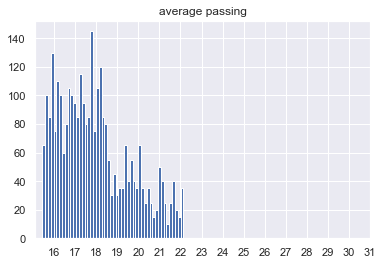

In [65]:
coded = np.loadtxt(os.path.join("output","LV3","Avg","LV3RejectionResults.txt"))
SCfreqs = np.loadtxt(os.path.join("output","LV3","Avg","SCfreqs"))
mappedIDxs,freqsAVGpassing = getRasterData(coded,SCfreqs)#returns the network ids mapped from 0-#passing networks, and the SC frequencies at which the network id passed

counts, bins = np.histogram(freqsAVGpassing,bins=np.arange(16,32))
plt.hist(freqsAVGpassing,bins=50, align='left')
plt.xticks(np.arange(16,32),np.arange(16,32))
plt.title('average passing')
plt.savefig('average passing')

In [67]:
len(freqsAVGpassing)

3120

In [68]:
len(freqsnonavgpassing)

3865

In [211]:
a1 = np.where(freqsAVGpassing >18 )[0] 
a2 = np.where(freqsAVGpassing < 21)[0]

In [212]:
a1Ina2 = [1 if a1[i] in a2 else 0 for i in range(len(a1))]

In [213]:
a1Ina2.count(1)

2780

In [124]:
print('%d averaged parameter sets including repetitions passed\n%d nonaveraged parameter sets including repetitions passed' %(freqsAVGpassing.shape[0],freqsnonavgpassing.shape[0]))

4955 averaged parameter sets including repetitions passed
4815 nonaveraged parameter sets including repetitions passed


In [193]:
freqsAVGpassing.shape

(5145,)

### raster plot of frequencies that cells pass

file saved as cellIdsfreq.png


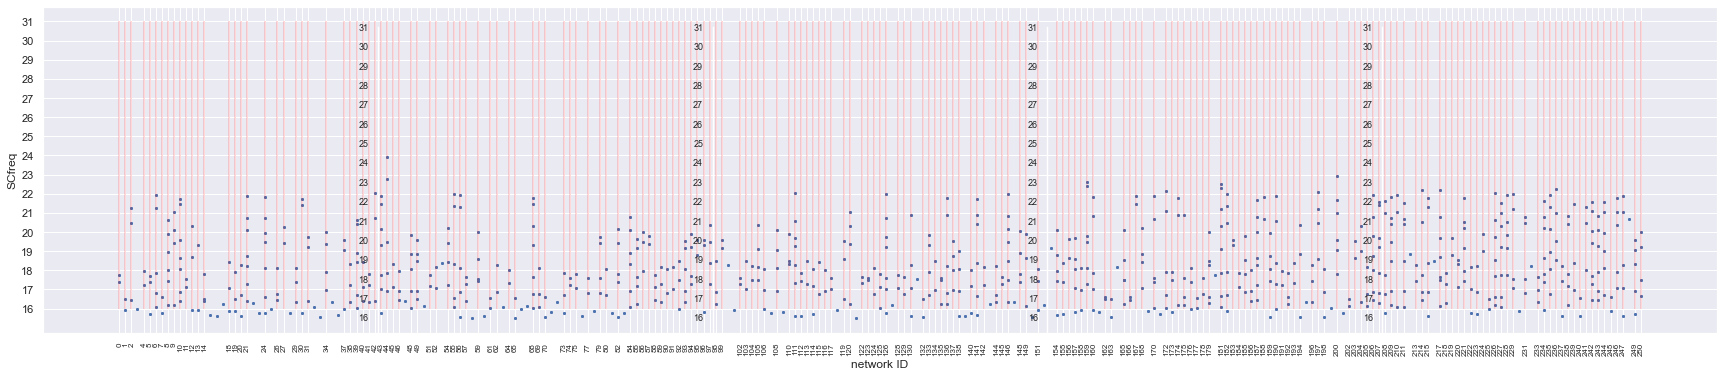

In [69]:
coded = np.loadtxt(os.path.join("output","LV3","LV3RejectionResults.txt"))
SCfreqsnonavg = np.loadtxt(os.path.join("output","LV3","SCfreqs"))
mappedIDxs,freqsnonavgpassing = getRasterData(coded,SCfreqsnonavg)
plotRaster(mappedIDxs,freqsnonavgpassing)

## find and plot the network in the original data from the network id in the raster

In [8]:
coded = np.loadtxt(os.path.join(archivedPath,"output","LV3","LV3RejectionResults.txt"))
passnetIDs,passnetIDXs = getpassingNetIDXs(coded)
mappedIDxs,IDxs = mapping(passnetIDXs)
unMap(mappedIDxs,IDxs,passnetIDs,9)

-1

In [244]:
Trials = LV2Params.shape[1]
LVL = 'LV3'
seed = 222
SCfreqs = []
bufferSize = 50
np.random.seed(int(seed))
for j in range(0,int(Trials/16/5)):
    for i in range(0,16):
        SCfreqs.append(np.random.uniform(15.5+i,16.5+i))
if LVL == 'LV3':
    SCfreqs = np.repeat(SCfreqs,5)


In [238]:
All = []
for j in range(0,int(Trials/16)):
    for i in range(0,16):
        freq = SCfreqs[(j*16)+i]*0.6
        spikeNo = math.ceil(freq*.300)#the frequency for the 300 ms beginning
        firstPart = np.linspace(300,600,spikeNo)

        freq = SCfreqs[(j*16)+i]*0.9
        spikeNo = math.ceil(freq*0.600)#the freq for the 600 ms middle
        secondPart = np.linspace(600,1200,spikeNo)
        secondSpace = math.floor(secondPart[3] - secondPart[2])#we want the first event of the middle of the burst to be the same distance from the last spike of the first time..
        secondPart = np.linspace(firstPart[len(firstPart)-1]+secondSpace ,1200,spikeNo)#..so the spikes remain relatively even

        freq = SCfreqs[(j*16)+i]*0.4
        spikeNo = math.ceil(freq*.100)#freq for the 100 ms end 
        thirdPart = np.linspace(1200,1300,spikeNo)
        thirdSpace = math.floor(secondPart[len(secondPart)-1] - secondPart[len(secondPart)-2])
        thirdPart = np.linspace(secondPart[len(secondPart)-1] + thirdSpace,1200,spikeNo)
        

        args = [firstPart,secondPart,thirdPart,np.zeros((bufferSize-(len(firstPart)+ len(secondPart) + len(thirdPart))))]
        All.append(np.concatenate(args,axis=0))

All = np.array(All,dtype=object)

In [4]:
VsomaControl = np.array(pd.read_pickle(r"C:\Users\ddopp\source\repos\CGresults\notAVG\output\LV3\VsomaControl.pkl")).T
VsomaTEA = np.array(pd.read_pickle(r"C:\Users\ddopp\source\repos\CGresults\notAVG\output\LV3\VsomaTEA.pkl")).T

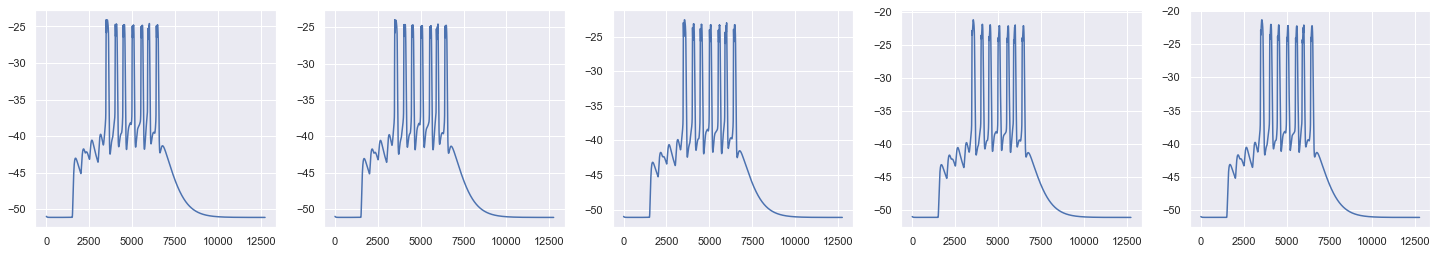

In [156]:

plotNet(VsomaControl,neworkID,16)
plt.show()

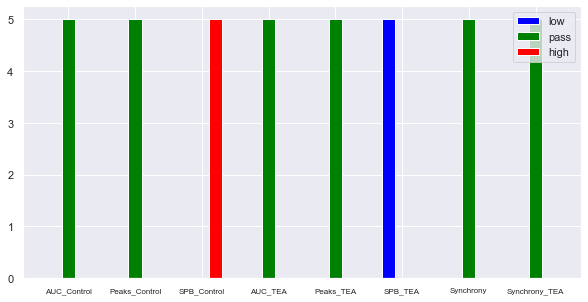

In [153]:
plotFailCrit(coded[:,neworkID*80+10:neworkID*80+15],LV3CritList())
plt.show()

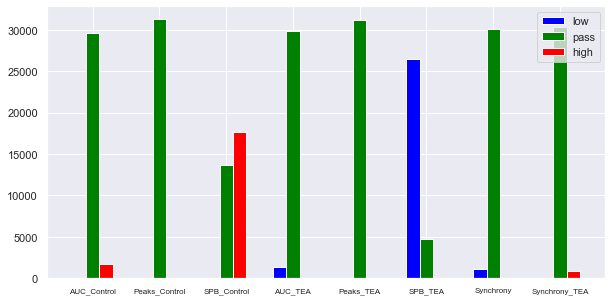

In [174]:
rejectionResults = np.loadtxt(os.path.join("output","LV3","LV3RejectionResults.txt"))
plotFailCrit(rejectionResults,LV3CritList())
plt.savefig('rejection criteria LV3')
plt.show()

### development

In [67]:
#plot boxplots of all parameters of interest for passing or nonpassing cells

In [91]:
def getStats(paramsDF,failCriteriaRaw,failCriteriacoded,passing):#unused
    
    [a,b] = failCriteriacoded.shape
    if passing == 'passing':
        IDXs = np.where(failCriteriacoded[a-1,:]==1)[0]
    elif passing == 'low':
        IDXs = np.where(failCriteriacoded[a-1,:]<1)[0]
    elif passing == 'high':
        IDXs = np.where(failCriteriacoded[a-1,:] > 1)[0]
    
    selected_df = pd.DataFrame([paramsDF[key][IDXs] for key in paramsDF]).T
        

In [92]:
def summaryStats(selecteddf,pair):   
    
    AVG = np.mean(selecteddf[pair[0]])
    STD = np.std(selecteddf[pair[0]])
    #Skew = stats.skew(selecteddf)
   # Kurt = stats.kurtosis(selecteddf, fisher=True)
    retDict = {'parameter' : pair[0],
               'rCriteria': pair[1],
               'AVG' : AVG,
               'STD': STD,
               #'Skew' : Skew,
               #'Kurt' : Kurt
              }
    return retDict

In [93]:
def tTest(passDf,failDf,pair):
    eqVar = True
    if abs(np.std(passDf[pair[0]]) - np.std(passDf[pair[1]]) ) < abs(np.std(passDf[pair[0]]))/ 2:
        eqVar = False
    return stats.ttest_ind(passDf[pair[0]], failDf[pair[0]], equal_var=eqVar)

In [122]:
def makestatsDict(paramsDF,failCriteriacoded,pairList,passing):
    
    allStats = []
    for i in range(len(pairList)):
        passIDXs = failCriteriacoded[pairList[i][1]] == 1
        lowIDXs = failCriteriacoded[pairList[i][1]] < 1
        highIDXs = failCriteriacoded[pairList[i][1]] > 1

        passdf = pd.DataFrame([paramsDF[key][passIDXs] for key in paramsDF]).T
        lowdf = pd.DataFrame([paramsDF[key][lowIDXs] for key in paramsDF]).T
        highdf = pd.DataFrame([paramsDF[key][highIDXs] for key in paramsDF]).T
        

        if passing == 'passing':
            statsDict = summaryStats(passdf,pairList[i])
            lowtest = tTest(passdf,lowdf,pairList[i])
            hightest = tTest(passdf,highdf,pairList[i])
            statsDict.update({'fail low p-value':lowtest[1]})
            statsDict.update({'fail high p-value': hightest[1]})
        elif passing == 'low':
            statsDict = summaryStats(lowdf,pairList[i])
        elif passing == 'high':
            statsDict = summaryStats(highdf,pairList[i])
        allStats.append(statsDict)
    allStats = pd.DataFrame(allStats)
    return allStats

In [154]:

rejectionResultsRaw = np.loadtxt(os.path.join("output","LV3","LV3RejectionRaw.txt"))
rejectionResults = np.loadtxt(os.path.join("output","LV3","LV3RejectionResults.txt"))
params = np.array(pd.read_pickle(os.path.join("output","LV3","passParamsRepeat"  + ".pkl")))

In [164]:
paramsDF = pd.DataFrame(np.vstack((params,rejectionResultsRaw)).T,columns = fullParamsList() + LV3CritList())
#concat params with rejection results data, and make a df with the columns as variables
passIdxs,failIdxs,allIdxs = getPassIdxs(rejectionResults)
passParams = getEveryFirstNet(LV3passParams[:,passIdxs])
# get only the passing parameters into a dataframe keeping columns as variables
passParamsDF = pd.DataFrame([paramsDF[key][passIdxs] for key in paramsDF]).T
flParamsDF = pd.DataFrame([paramsDF[key][failIdxs] for key in paramsDF]).T

In [96]:
# get the df with pass or fail idxs, get a list of the pass pairs and for each pair, get sum stats. print(this is the mean for passpair 0  that passed)

In [165]:
#get a df of the correlogram but with only the correlations between intrinsic parameters and rejection criteria that are above 0.2
dfCorr = passParamsDF.corr(method='pearson')
maskedDFCorr = np.array(dfCorr)
mask = (abs(dfCorr) > 0.1) & (abs(dfCorr < 1))
mask = np.array(mask)
for i in range(len(mask)):
    for j in range(len(mask)):
        if (i < len(fullParamsList())) & (j <len(fullParamsList())):
            maskedDFCorr[i][j] = np.nan

maskedDFCorr = pd.DataFrame(maskedDFCorr)
maskedDFCorr = maskedDFCorr[pd.DataFrame(mask)]
maskedDFCorr.columns = fullParamsList() + LV3CritList()
maskedDFCorr.index = fullParamsList() + LV3CritList()

In [166]:
#get a list of the pairs of parameters and rejection criteria that are above 0.2
passpairs = []
for param1 in maskedDFCorr:
    for i in range(len(maskedDFCorr[param1])):
        if not np.isnan(maskedDFCorr[param1][i]):
            passpairs.append((param1,(maskedDFCorr.keys())[i]))
passpairs = list(set(passpairs))
pairList = []
for pair in passpairs:
    if pair[0] in fullParamsList():       
        pairList.append(pair)

In [167]:
failCriteriacoded = pd.DataFrame(rejectionResults).T
failCriteriacoded.columns = LV3CritList()

In [168]:
lowDict = makestatsDict(paramsDF,failCriteriacoded,pairList,'low')
passDict = makestatsDict(paramsDF,failCriteriacoded,pairList,'passing')
highDict = makestatsDict(paramsDF,failCriteriacoded,pairList,'high')
passDict.columns = ['parameter','rCriteria','AVG_passing','STD_passing','fail low p-value','fail high p-value']
lowDict.columns = ['parameter','rCriteria','AVG_Low','STD_Low']
highDict.columns = ['parameter','rCriteria','AVG_High','STD_High']
allDF = pd.merge(passDict,lowDict)
allDF = pd.merge(allDF,highDict)
allDF = allDF[['parameter','rCriteria','AVG_passing','STD_passing','AVG_Low','STD_Low','AVG_High','STD_High','fail low p-value','fail high p-value']]

In [169]:
allDF

,parameter,rCriteria,AVG_passing,STD_passing,AVG_Low,STD_Low,AVG_High,STD_High,fail low p-value,fail high p-value
0,soma_leak,AUC_TEA,0.000230,0.000093,0.000250,0.000100,0.000091,8.782207e-06,3.067343e-14,2.259020e-05
1,soma_leak,Synchrony,0.000234,0.000093,0.000144,0.000066,NaN,NaN,6.242721e-231,NaN
2,neurite_leak,AUC_Control,0.000190,0.000082,NaN,NaN,0.000146,7.473124e-05,NaN,1.032361e-101
3,soma_skkca,AUC_TEA,0.001429,0.000320,0.001494,0.000330,0.001324,2.380062e-04,1.201955e-13,3.540920e-01
4,soma_leak,AUC_Control,0.000238,0.000091,NaN,NaN,0.000118,4.642737e-05,NaN,0.000000e+00
5,soma_leak,Synchrony_TEA,0.000228,0.000093,NaN,NaN,0.000318,5.937218e-05,NaN,1.858927e-180
6,soma_cal,AUC_TEA,0.000097,0.000018,0.000102,0.000019,0.000068,5.250477e-07,2.130853e-25,8.872969e-06
7,soma_leak,Peaks_Control,0.000231,0.000094,NaN,NaN,NaN,NaN,NaN,NaN
8,soma_nap2,Peaks_TEA,0.000233,0.000071,0.000132,0.000056,NaN,NaN,5.277541e-22,NaN
9,neurite_leak,AUC_TEA,0.000185,0.000082,0.000236,0.000077,0.000089,3.606051e-05,2.847716e-111,8.913501e-04


In [9]:
allDF.to_csv('rejectionStatsAVG.csv')

### check uniqueness of data

In [13]:
LV2VControl = np.array(pd.read_pickle(os.path.join("output","LV2","VSomaControl.pkl"))).T

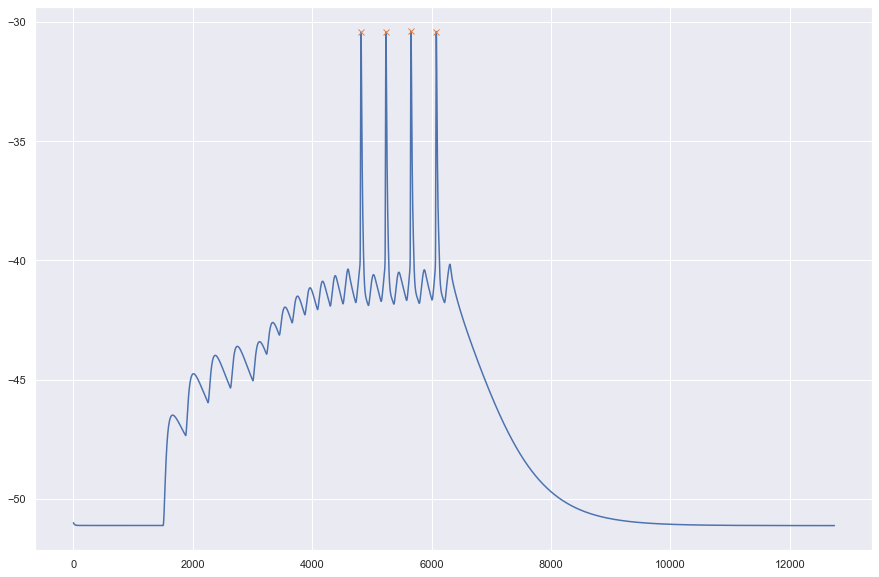

In [14]:
plt.figure(figsize=(15,10))
peaks, _ = find_peaks(LV2VControl[:,9],distance=120, height = -35,prominence=(2,None))
plt.plot(LV2VControl[:,9])
plt.plot(peaks, LV2VControl[peaks,9], "x")
plt.show()

# plot passing network SIZ and Isyn under the Voltage trace. And event times

In [2]:
LV3SIZ = np.array(pd.read_pickle(os.path.join("output","LV3","VSIZControl.pkl")))
LV3SIZ.shape
LV3ISYN = np.array(pd.read_pickle(os.path.join("output","LV3","ISYNControl.pkl")))
LV3Soma = np.array(pd.read_pickle(os.path.join("output","LV3","VSomaControl.pkl")))
ET = np.array(pd.read_pickle(os.path.join("output","LV3","EventTimesControl.pkl")))

In [21]:
times = np.linspace(0,2550,LV3SIZ.shape[1])

In [4]:
ET.shape

(80, 25)

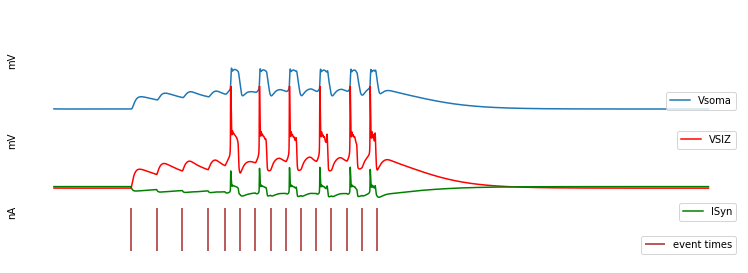

In [23]:
cellNum = 1
freqNo = 18
IDX = (freqNo-16)*5 +cellNum


fig,axs = plt.subplots(4,figsize=(10,5),sharex=True,sharey=True, subplot_kw=dict(frameon=False))
axs[0].plot(times,LV3Soma[IDX,:],label='Vsoma')
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_ylim([-52,-20])
axs[0].set_position([0,1,1,0.3])
axs[0].legend(loc='lower right')
axs[0].set_ylabel('mV')

axs[1].plot(times,LV3SIZ[IDX,:],label='VSIZ',color='r')
axs[1].set_ylim([-55,20])
axs[1].set_position([0,0.78,1,0.3])
axs[1].legend(loc='right')
axs[1].set_ylabel('mV')

axs[2].plot(times,LV3ISYN[IDX,:],label='ISyn',color='g')
axs[2].set_position([0,0.58,1,0.3])
axs[2].legend(loc='right')
axs[2].set_ylabel('nA')

axs[3].vlines((ET[IDX,:]/.2).T,ymin=-50,ymax=-20,label='event times',color='brown')
axs[3].set_position([0,0.6,1,0.3])
axs[3].legend(loc='lower right')
plt.savefig('traces.png',dpi=500,facecolor='w',bbox_inches='tight')
plt.show()

In [9]:
LV3Soma.shape

(80, 12751)

In [18]:
np.linspace(0,2550,12751)

array([0.0000e+00, 2.0000e-01, 4.0000e-01, ..., 2.5496e+03, 2.5498e+03,
       2.5500e+03])

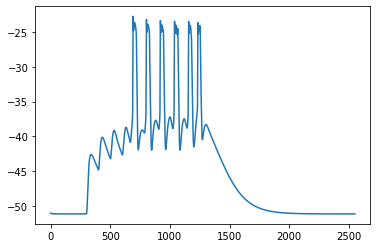

In [22]:
plt.plot(times,LV3Soma[IDX,:])

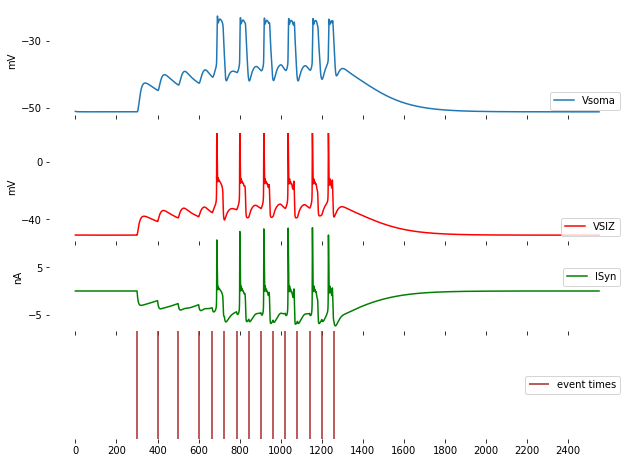

In [54]:
cellNum = 1
freqNo = 18
IDX = (freqNo-16)*5 +cellNum
ETIDX = freqNo-16

fig,axs = plt.subplots(4,figsize=(8,5),sharex=True, subplot_kw=dict(frameon=False))
axs[0].plot(times,LV3Soma[IDX,:],label='Vsoma')
axs[0].set_xticks(list(np.arange(0,2550,200)))
axs[0].set_yticks([-50,-30])
axs[0].set_ylim([-52,-20])
axs[0].set_position([0,1,1,0.3])
axs[0].legend(loc='lower right')
axs[0].set_ylabel('mV')

axs[1].plot(times,LV3SIZ[IDX,:],label='VSIZ',color='r')
axs[1].set_ylim([-55,20])
axs[1].set_position([0,0.65,1,0.3])
axs[1].set_yticks([-40,0])
axs[1].legend(loc='lower right')
axs[1].set_ylabel('mV')

axs[2].plot(times,LV3ISYN[IDX,:],label='ISyn',color='g')
axs[2].set_position([0,0.40,1,0.3])
axs[2].set_yticks([-5,5])
axs[2].legend(loc='right')
axs[2].set_ylabel('nA')

axs[3].vlines((ET[IDX,:]).T,ymin=0,ymax=1,label='event times',color='brown')
axs[3].set_ylim([0,1])
axs[3].set_position([0,0.1,1,0.3])
axs[3].set_yticks([])
axs[3].legend(loc='right')

plt.savefig('traces.png',dpi=500,facecolor='w',bbox_inches='tight')
plt.show()

# find the synaptic conductances that give passing networks:

## LV2

In [57]:
archivedPathLow = os.path.join("..","CGresults","fixed_Gsyn","Low")
archivedPathMed = os.path.join("..","CGresults","fixed_Gsyn","Med")
archivedPathHigh = os.path.join("..","CGresults","fixed_Gsyn","High")
#C:\Users\ddopp\source\repos\CGresults\fixed_Gsyn\Low\LV3
#archivedPath  = "output"
LV2ParamsLow =  np.array(pd.read_pickle(os.path.join(archivedPathLow,"LV2","passParamsRepeatControl.pkl")))
LV2ParamsMed = np.array(pd.read_pickle(os.path.join(archivedPathMed,"LV2","passParamsRepeatControl.pkl")))
LV2ParamsHigh = np.array(pd.read_pickle(os.path.join(archivedPathHigh,"LV2","passParamsRepeatControl.pkl")))

LV2codedLow = np.loadtxt(os.path.join(archivedPathLow,"LV2","LV2RejectionResults.txt"))
LV2codedMed = np.loadtxt(os.path.join(archivedPathMed,"LV2","LV2RejectionResults.txt"))
LV2codedHigh = np.loadtxt(os.path.join(archivedPathHigh,"LV2","LV2RejectionResults.txt"))

LV2passIdxsLow,LV2failIdxsLow,LV2allIdxsLow = getPassIdxs(LV2codedLow,'LV2')#indices of each cell that passed including repeats at different freqs, same for fail, 1 marked at all 16 freqs at which a cell passed
LV2passIdxsMed,LV2failIdxsMed,LV2allIdxsMed = getPassIdxs(LV2codedMed,'LV2')
LV2passIdxsHigh,LV2failIdxsHigh,LV2allIdxsHigh = getPassIdxs(LV2codedHigh,'LV2')


paramsLV2PassingLow = LV2ParamsLow[:,LV2passIdxsLow]
paramsLV2PassingMed = LV2ParamsMed[:,LV2passIdxsMed]
paramsLV2PassingHigh = LV2ParamsHigh[:,LV2passIdxsHigh]

using LV2
using LV2
using LV2


In [117]:
%matplotlib widget

In [119]:
%matplotlib inline

In [60]:
testparams.shape


(15, 633)

In [ ]:
testparams = paramsLV2PassingLow
plt.figure(figsize=(20,5))
plt.hist(testparams)
plt.title('LV2 passing networks')
plt.xlabel('uS')
plt.ylabel('# cells')
plt.show()

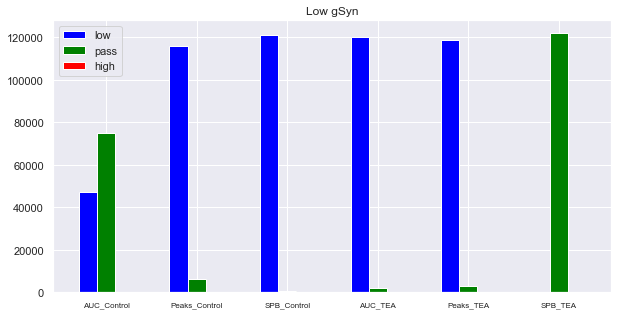

In [62]:
testCoded  = LV2codedLow
testCodedList = LV2CritList()
plotFailCrit(testCoded,testCodedList)
plt.title('Low gSyn')
plt.show()

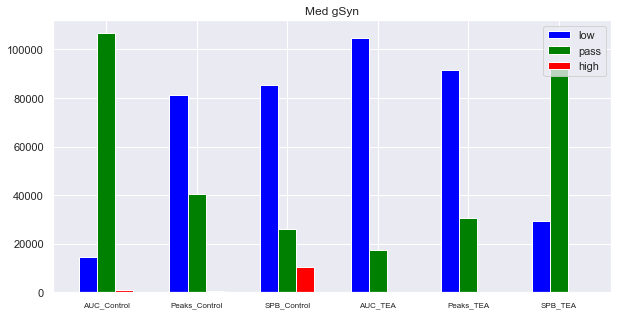

In [63]:
testCoded  = LV2codedMed
testCodedList = LV2CritList()
plotFailCrit(testCoded,testCodedList)
plt.title('Med gSyn')
plt.show()

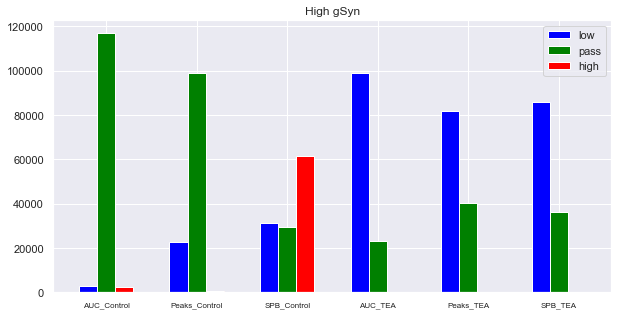

In [64]:
testCoded  = LV2codedHigh
testCodedList = LV2CritList()
plotFailCrit(testCoded,testCodedList)
plt.title('High gSyn')
plt.show()

In [5]:
SCfreqs = np.loadtxt(os.path.join(archivedPath,"LV2",'SCfreqs'))
SCfreqsPassing = SCfreqs[passIdxs]

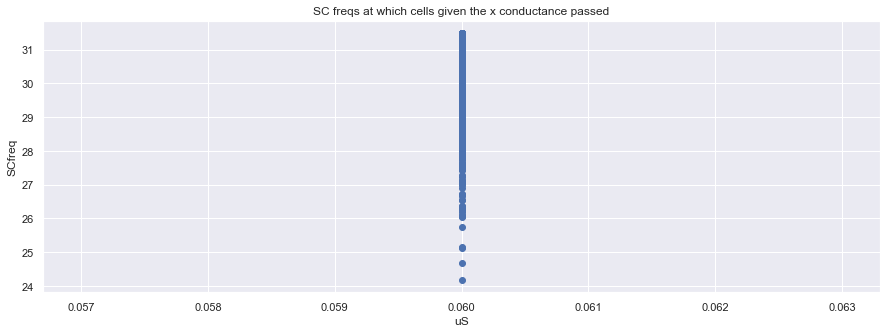

In [6]:
plt.figure(figsize=(15,5))
plt.scatter(LV2Params[paramsLV2Passing.shape[0]-1,passIdxs],SCfreqsPassing)
plt.title('SC freqs at which cells given the x conductance passed')
plt.xlabel('uS')
plt.ylabel('SCfreq')
plt.savefig('scfreq vs gSyn.png',dpi=200)
plt.show()

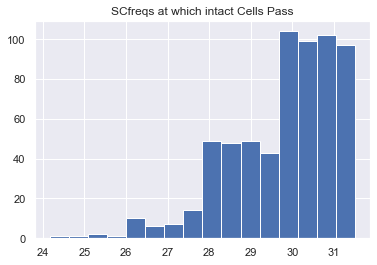

In [7]:
plt.hist(SCfreqsPassing,bins=16)
plt.title('SCfreqs at which intact Cells Pass')
plt.show()

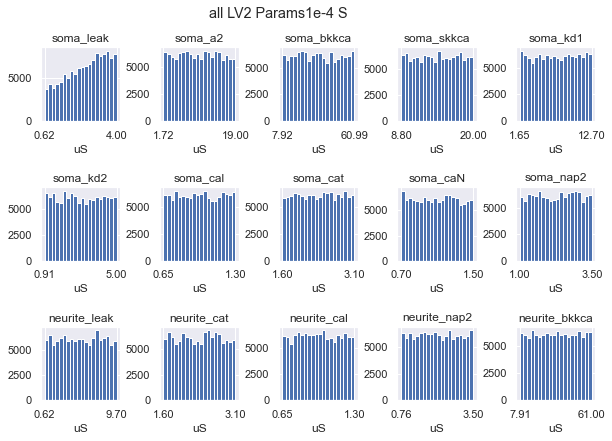

In [11]:
plotDistributions(LV2Params,fullParamsList(),20,title = 'all LV2 Params',xlabels='uS')

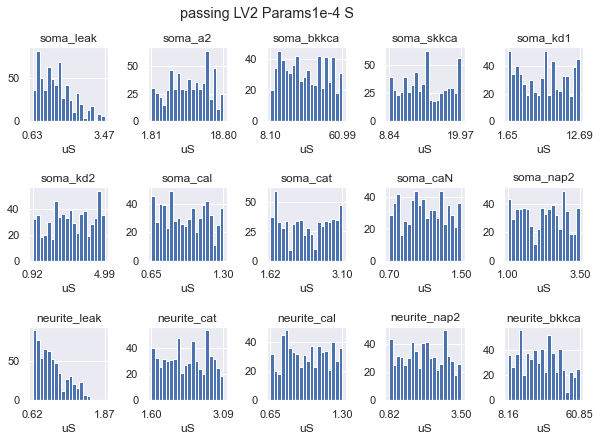

In [12]:
plotDistributions(LV2Params[:,passIdxs],fullParamsList(),20,title = 'passing LV2 Params',xlabels='uS')

## LV3

In [2]:
#archivedPathLV3 = os.path.join("..","CGresults","fixed_Gsyn","Med")
archivedPathLV3 = os.path.join("..","CGresults","variable_Gsyn")
#LV3Params =  np.array(pd.read_pickle(os.path.join(archivedPath,"LV3","passParamsRepeat.pkl")))
#coded = np.loadtxt(os.path.join(archivedPath,"LV3","LV3RejectionResults.txt"))

LV3Params = np.array(pd.read_pickle(os.path.join(archivedPathLV3,"LV3","passParamsRepeat.pkl")))
codedLV3 = np.loadtxt(os.path.join(archivedPathLV3,"LV3","LV3RejectionResults.txt"))
rawLV3 = np.loadtxt(os.path.join(archivedPathLV3,"LV3","LV3RejectionRaw.txt"))
totalParamsLV3 = np.vstack((LV3Params,rawLV3))
SCfreqsLV3 = np.loadtxt(os.path.join(archivedPathLV3,"LV3",'SCfreqs'))
passIdxsLV3,failIdxs,allIdxs = getPassIdxs(codedLV3,'LV3')
passParamsLV3 = LV3Params[:,passIdxsLV3]

using LV3


In [51]:

#passParams = getEveryFirstNet(LV3passParams[:,passIdxs])
archivedPathLow = os.path.join("..","CGresults","fixed_Gsyn","Low")
archivedPathMed = os.path.join("..","CGresults","fixed_Gsyn","Med")
archivedPathHigh = os.path.join("..","CGresults","fixed_Gsyn","High")
archivedPathLowgSynLowRSIZ = os.path.join("..","CGresults","fixed_Gsyn","LowgSynLowRSIZ")
#C:\Users\ddopp\source\repos\CGresults\fixed_Gsyn\Low\LV3
#archivedPath  = "output"
LV3ParamsLow =  np.array(pd.read_pickle(os.path.join(archivedPathLow,"LV3","passParamsRepeat.pkl")))
LV3ParamsMed = np.array(pd.read_pickle(os.path.join(archivedPathMed,"LV3","passParamsRepeat.pkl")))
LV3ParamsHigh = np.array(pd.read_pickle(os.path.join(archivedPathHigh,"LV3","passParamsRepeat.pkl")))
LV3ParamsLowgSynLowRSIZ = np.array(pd.read_pickle(os.path.join(archivedPathLowgSynLowRSIZ,"LV3","passParamsRepeat.pkl")))

LV3codedLow = np.loadtxt(os.path.join(archivedPathLow,"LV3","LV3RejectionResults.txt"))
LV3codedMed = np.loadtxt(os.path.join(archivedPathMed,"LV3","LV3RejectionResults.txt"))
LV3codedHigh = np.loadtxt(os.path.join(archivedPathHigh,"LV3","LV3RejectionResults.txt"))
LV3codedLowgSynLowRSIZ = np.loadtxt(os.path.join(archivedPathLowgSynLowRSIZ,"LV3","LV3RejectionResults.txt"))

LV3RawLow = np.loadtxt(os.path.join(archivedPathLow,"LV3","LV3RejectionRaw.txt"))
LV3RawMed = np.loadtxt(os.path.join(archivedPathMed,"LV3","LV3RejectionRaw.txt"))
LV3RawHigh = np.loadtxt(os.path.join(archivedPathHigh,"LV3","LV3RejectionRaw.txt"))
LV3RawLowgSynLowRSIZ = np.loadtxt(os.path.join(archivedPathLowgSynLowRSIZ,"LV3","LV3RejectionRaw.txt"))


LV3passIdxsLow,LV3failIdxsLow,LV3allIdxsLow = getPassIdxs(LV3codedLow,'LV3')#indices of each cell that passed including repeats at different freqs, same for fail, 1 marked at all 16 freqs at which a cell passed
LV3passIdxsMed,LV3failIdxsMed,LV3allIdxsMed = getPassIdxs(LV3codedMed,'LV3')
LV3passIdxsHigh,LV3failIdxsHigh,LV3allIdxsHigh = getPassIdxs(LV3codedHigh,'LV3')
LV3passIdxsLowgSynLowRSIZ,LV3failIdxsLowgSynLowRSIZ,LV3allIdxsLowgSynLowRSIZ = getPassIdxs(LV3codedLowgSynLowRSIZ,'LV3')

paramsLV3PassingLow = LV3ParamsLow[:,LV3passIdxsLow]
paramsLV3PassingMed = LV3ParamsMed[:,LV3passIdxsMed]
paramsLV3PassingHigh = LV3ParamsHigh[:,LV3passIdxsHigh]
paramsLV3PassingLowgSynLowRSIZ = LV3ParamsLowgSynLowRSIZ[:,LV3passIdxsLowgSynLowRSIZ]

totalParamsLV3PassingLow = np.vstack((paramsLV3PassingLow,LV3RawLow[:,LV3passIdxsLow]))#for use in Correlogram
totalParamsLV3PassingMed = np.vstack((paramsLV3PassingMed,LV3RawMed[:,LV3passIdxsMed]))
totalParamsLV3PassingHigh = np.vstack((paramsLV3PassingHigh,LV3RawHigh[:,LV3passIdxsHigh]))
totalParamsLV3PassingLowgSynLowRSIZ = np.vstack((paramsLV3PassingLowgSynLowRSIZ,LV3RawLowgSynLowRSIZ[:,LV3passIdxsLowgSynLowRSIZ]))


using LV3
using LV3
using LV3
using LV3


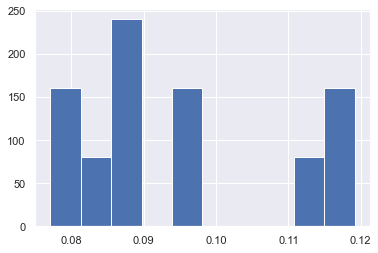

In [7]:
plt.hist(passParamsLV3[16,:])
plt.show()

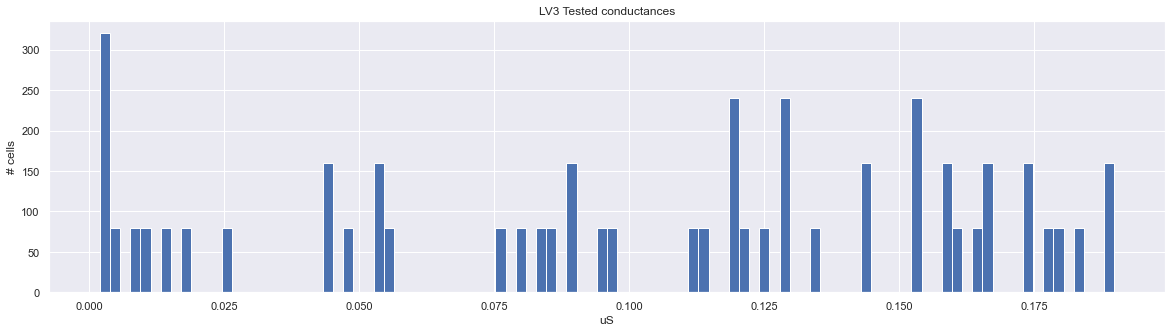

In [8]:
plt.figure(figsize=(20,5))
plt.hist(LV3Params[LV3Params.shape[0]-1,:],bins=100)
plt.title('LV3 Tested conductances')
plt.xlabel('uS')
plt.ylabel('# cells')
plt.show()

In [69]:
#%matplotlib widget
%matplotlib inline

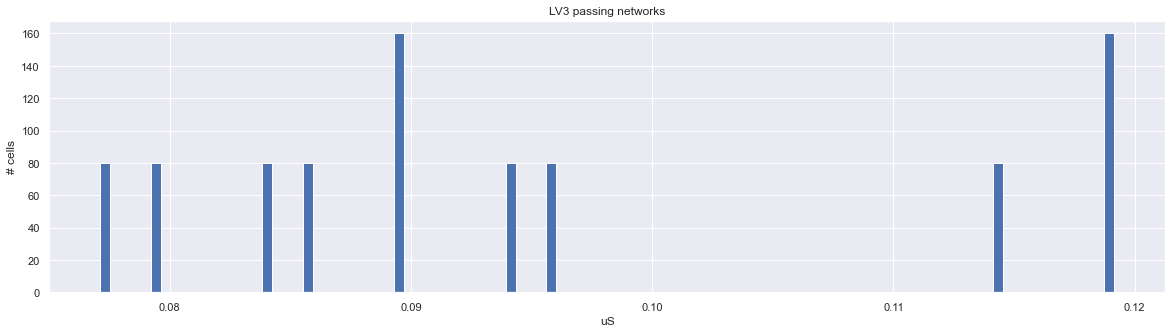

In [9]:
#34 passing networks
#160 means two networks passed, 80 means 1 network passed
plt.figure(figsize=(20,5))
plt.hist(passParamsLV3[passParamsLV3.shape[0]-1,:],bins=100)
plt.title('LV3 passing networks')
plt.xlabel('uS')
plt.ylabel('# cells')
plt.savefig('passing conductances.png')
plt.show()

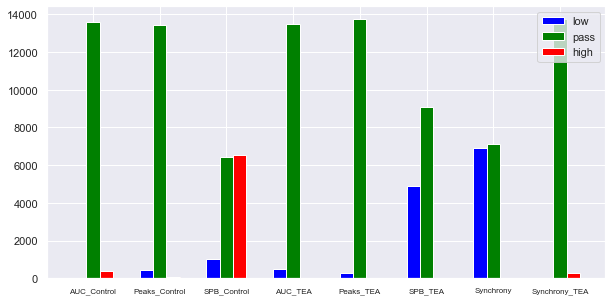

In [13]:
plotFailCrit(codedLV3,LV3CritList())

plt.show()

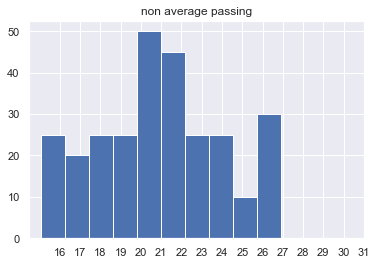

In [11]:
mappedIDxs,freqsnonavgpassing = getRasterData(codedLV3,SCfreqsLV3)#returns the network ids mapped from 0-#passing networks, and the SC frequencies at which the network id passed
counts, bins = np.histogram(freqsnonavgpassing,bins=np.arange(16,32))
plt.hist(freqsnonavgpassing, align='left')
plt.xticks(np.arange(16,32),np.arange(16,32))
plt.title('non average passing')
plt.savefig('non average passing')

In [21]:
min(passParamsLV3[passParamsLV3.shape[0]-1,:])

0.0007942664

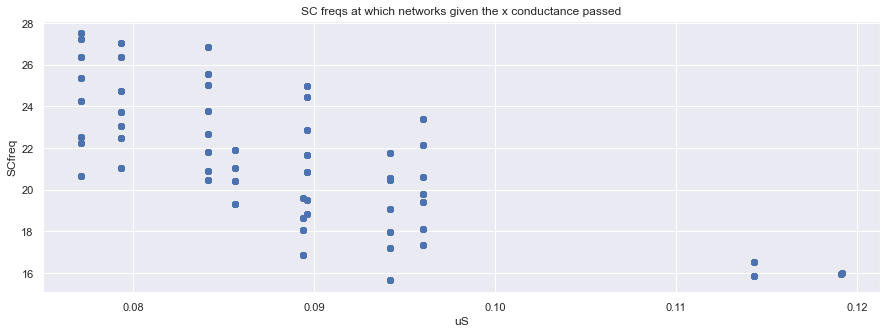

In [12]:
plt.figure(figsize=(15,5))
plt.scatter(passParamsLV3[passParamsLV3.shape[0]-1,mappedIDxs*80],freqsnonavgpassing)
plt.title('SC freqs at which networks given the x conductance passed')
plt.xlabel('uS')
plt.ylabel('SCfreq')
plt.show()

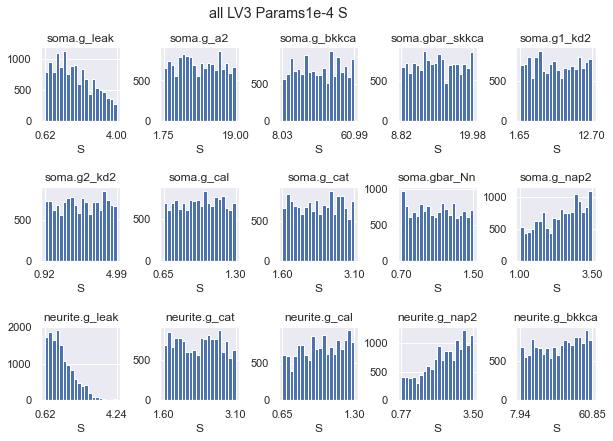

In [17]:
paramsList = list(rangeVarNames().keys())
plotDistributions(LV3Params,paramsList,20,xlabels='S',title = 'all LV3 Params')

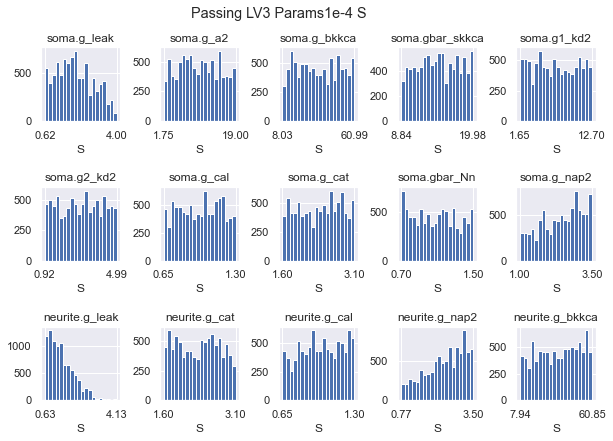

In [18]:
plotDistributions(LV3Params[:,passIdxsLV3],paramsList,20,xlabels='S',title = 'Passing LV3 Params')

from 36 Passing Networks
0.06 uS


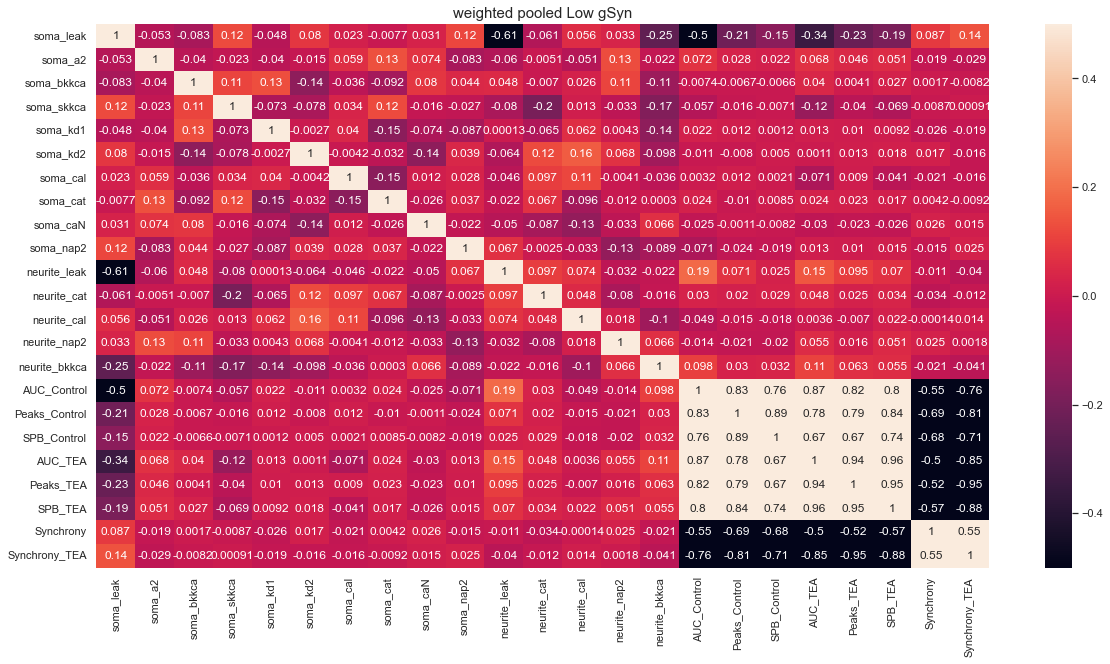

In [19]:
TestpassParams = totalParamsLV3PassingLow
TestparamsList = fullParamsList()+LV3CritList()
plotCorrelogram(TestpassParams,TestparamsList,'weighted pooled Low gSyn')
plt.savefig("low gSyn.png",dpi=300)
print("from %d Passing Networks" %(int(TestpassParams.shape[1]/80)))
print("0.06 uS")
plt.show()

from 113 Passing Networks
0.09 uS


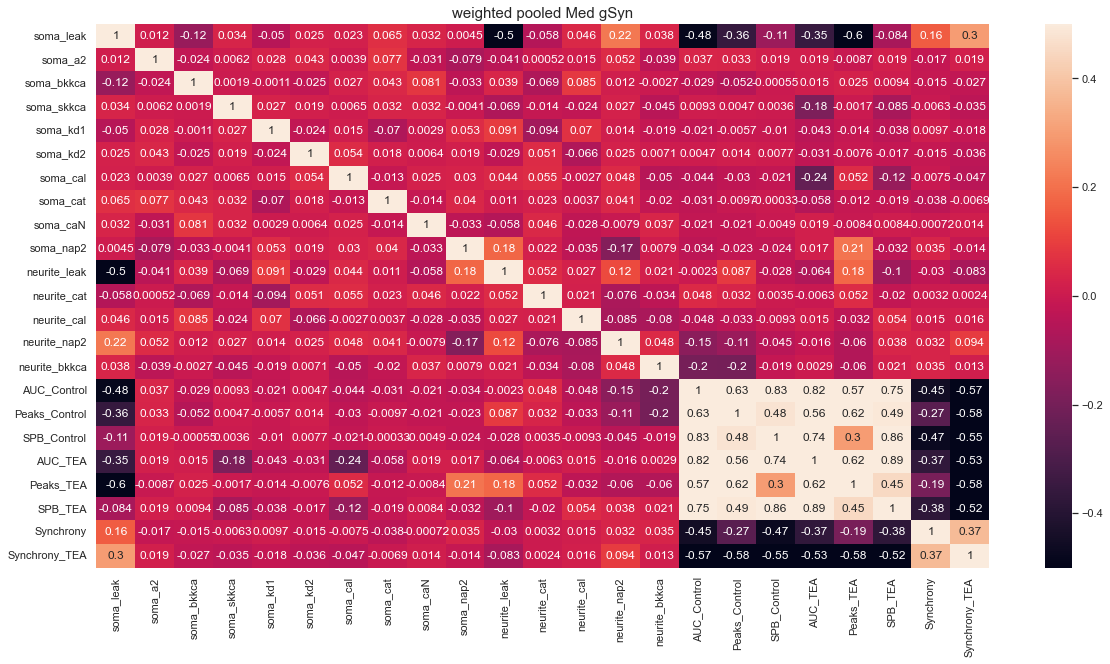

In [20]:
TestpassParams = totalParamsLV3PassingMed
TestparamsList = fullParamsList()+LV3CritList()
plotCorrelogram(TestpassParams,TestparamsList,'weighted pooled Med gSyn')
plt.savefig("Med gSyn.png",dpi=300)
print("from %d Passing Networks" %(int(TestpassParams.shape[1]/80)))
print("0.09 uS")
plt.show()

from 42 Passing Networks
0.12 uS


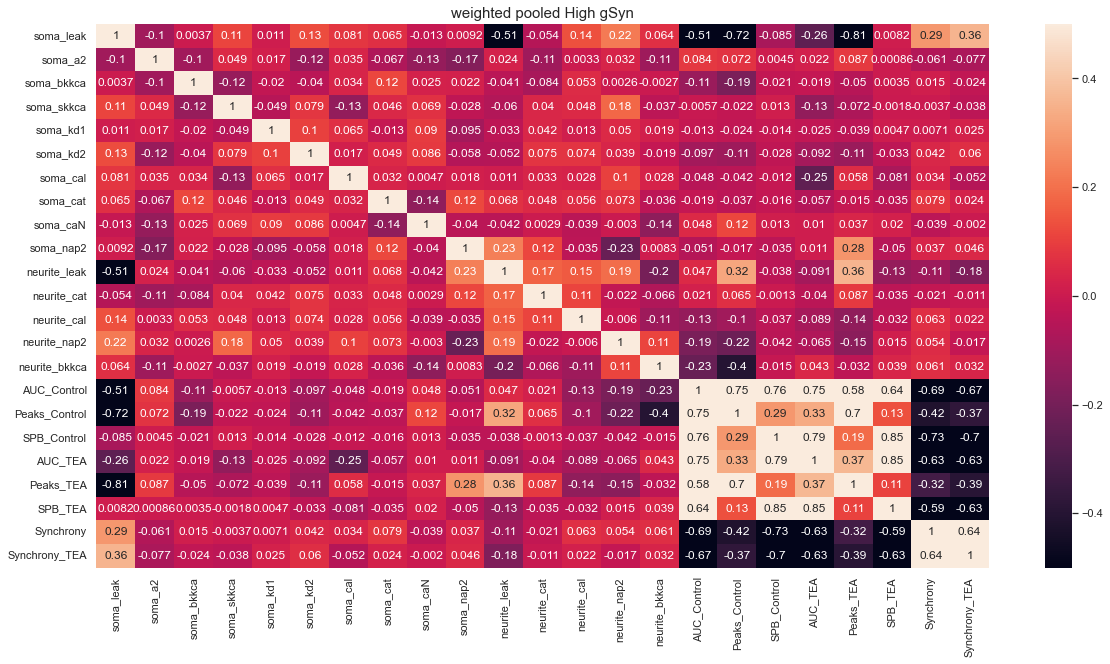

In [21]:
TestpassParams = totalParamsLV3PassingHigh
TestparamsList = fullParamsList()+LV3CritList()
plotCorrelogram(TestpassParams,TestparamsList,'weighted pooled High gSyn')
print("from %d Passing Networks" %(int(TestpassParams.shape[1]/80)))
print("0.12 uS")
plt.show()

# generate a table of the parameters according to compartment that has  values in a certain range

In [26]:
cTest = pd.DataFrame(np.corrcoef(paramsLV3PassingLow),index = fullParamsList(),columns = fullParamsList())

In [ ]:
cTest[np.logical_and(cTest > 0.1,cTest < 0.99)]

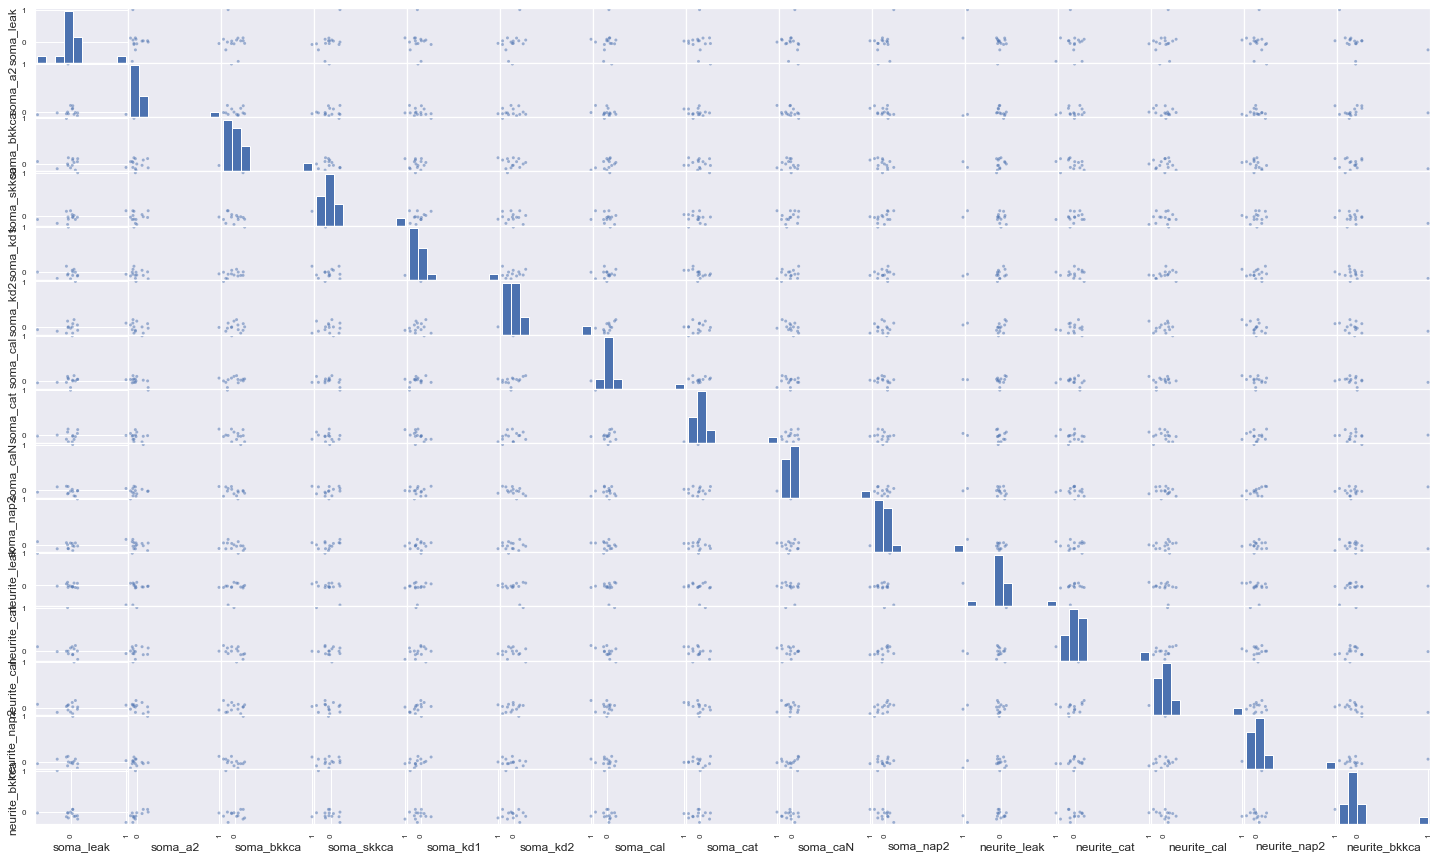

In [36]:
pd.plotting.scatter_matrix(cTest,figsize=(25,15))
plt.show()

In [7]:
def getRes(rType):
    var = "paramsLV3Passing" + rType
    TestpassParams = globals()[var]
    TestparamsList = fullParamsList()
    CorrRange = [0.1,0.999]
    
    def Report(df,Key):# so we can easily get soma or neurite
        r1 = [True if Key in CorrsDF.loc['conductance1'][i] else False for i in range(len(CorrsDF.loc['conductance1']))]
        r2 = [True if Key in CorrsDF.loc['conductance2'][i] else False for i in range(len(CorrsDF.loc['conductance2']))]
        query = np.logical_and(r1,r2)
        return pd.DataFrame([CorrsDF.loc['conductance1'][query],CorrsDF.loc['conductance2'][query],CorrsDF.loc['Pearsons_R'][query]])
# gets a data frame of all the values on the left lower diagonal which are in the CorrRange of interest 

    TestpassParamsCorr = np.corrcoef(TestpassParams)
    rList,cList,corrVals = [],[],[]
    for i in range(len(TestparamsList)):
        for j in range(len(TestparamsList)):
            if i >= j:#then we are in the right side of the correlogram
                pass
            elif CorrRange[0] < np.abs(TestpassParamsCorr[i][j]) < CorrRange[1]:
                rList.append(TestparamsList[i])
                cList.append(TestparamsList[j])
                corrVals.append(TestpassParamsCorr[i][j])

    CorrsDF = pd.DataFrame(data = [rList,cList,corrVals]).dropna(axis=1)
    CorrsDF.index = ["conductance1","conductance2","Pearsons_R"]

    somaCorrs = Report(CorrsDF,'soma')
    neuriteCorrs = Report(CorrsDF,'neurite')
    somaList = list(somaCorrs.columns)# the column keys so we can drop them to find soma x neurite combos
    neuriteList = list(neuriteCorrs.columns)
    somaXneuriteList =  list(CorrsDF.drop(somaList + neuriteList,axis=1).columns)

    sortedDF = CorrsDF[somaList + neuriteList + somaXneuriteList]
    sortedDFList =  ["soma"]  * sortedDF[somaList].shape[1] +  ["neurite"]  * sortedDF[neuriteList].shape[1] + ["somaXneurite"] * sortedDF[somaXneuriteList].shape[1]

    sortedDF.columns = sortedDFList
    return sortedDF.T

In [8]:
LowPass = getRes('Low')
MedPass = getRes('Med')
HighPass = getRes('High')

In [22]:
LowPass.to_csv('LowPass.csv')
MedPass.to_csv('MedPass.csv')
HighPass.to_csv('HighPass.csv')

In [9]:
rLow = list(LowPass[LowPass.keys()[0]])
cLow = list(LowPass[LowPass.keys()[1]])
valLow = list(LowPass[LowPass.keys()[2]])

rMed = list(MedPass[MedPass.keys()[0]])
cMed = list(MedPass[MedPass.keys()[1]])
valMed = list(MedPass[MedPass.keys()[2]])

rHigh = list(HighPass[HighPass.keys()[0]])
cHigh = list(HighPass[HighPass.keys()[1]])
valHigh = list(HighPass[HighPass.keys()[2]])

comboLow = [(rLow[i],cLow[i]) for i in range(len(rLow))]
comboMed = [(rMed[i],cMed[i]) for i in range(len(rMed))]
comboHigh = [(rHigh[i],cHigh[i]) for i in range(len(rHigh))]

In [10]:
# Low and Med
myList = []
print("{0:12} {1:15} {2:11} {3:10}".format("g1","g2","Low xcorr", "Med Xcorr"))
print("")
for i in range(len(comboLow)):
    if (comboLow[i] in comboMed):
        print(("{0:12} {1:13} {2:10.4f} {3:10.4f}".format(comboLow[i][0],comboLow[i][1],valLow[i],valMed[comboMed.index(comboLow[i])])))
        myList.append((comboLow[i][0],comboLow[i][1],valLow[i],valMed[comboMed.index(comboLow[i])]))
medLow = pd.DataFrame(myList,columns = ["g1","g2","Low xcorr", "Med Xcorr"])

g1           g2              Low xcorr   Med Xcorr 

soma_leak    neurite_leak     -0.6089    -0.4965
soma_nap2    neurite_nap2     -0.1293    -0.1652


In [11]:
medLow.to_csv('medLow.csv')

In [12]:
# Low and High
myList = []
print("{0:12} {1:15} {2:11} {3:10}".format("g1","g2","Low xcorr", "High Xcorr"))
print("")
for i in range(len(comboLow)):
    if (comboLow[i] in comboHigh):
        print(("{0:12} {1:13} {2:10.4f} {3:10.4f}".format(comboLow[i][0],comboLow[i][1],valLow[i],valHigh[comboHigh.index(comboLow[i])])))
        myList.append((comboLow[i][0],comboLow[i][1],valLow[i],valHigh[comboHigh.index(comboLow[i])]))
lowHigh = pd.DataFrame(myList,columns = ["g1","g2","Low xcorr", "High Xcorr"])

g1           g2              Low xcorr   High Xcorr

soma_leak    soma_skkca        0.1220     0.1118
soma_bkkca   soma_skkca        0.1100    -0.1227
neurite_cal  neurite_bkkca    -0.1024    -0.1091
soma_leak    neurite_leak     -0.6089    -0.5145
soma_nap2    neurite_nap2     -0.1293    -0.2306


In [13]:
lowHigh.to_csv('lowHigh.csv')

In [14]:
# Med and High
myList = []
print("{0:12} {1:15} {2:11} {3:10}".format("g1","g2","Med xcorr", "High Xcorr"))
print("")
for i in range(len(comboMed)):
    if (comboMed[i] in comboHigh):

        print(("{0:12} {1:10} {2:10.4f} {3:10.4f}".format(comboMed[i][0],comboMed[i][1],valMed[i],valHigh[comboHigh.index(comboMed[i])])))
        myList.append((comboMed[i][0],comboMed[i][1],valMed[i],valHigh[comboHigh.index(comboMed[i])]))
medHigh =  pd.DataFrame(myList,columns = ["g1","g2","Med xcorr", "High Xcorr"])

g1           g2              Med xcorr   High Xcorr

neurite_leak neurite_nap2     0.1224     0.1942
soma_leak    neurite_leak    -0.4965    -0.5145
soma_leak    neurite_nap2     0.2184     0.2200
soma_nap2    neurite_leak     0.1782     0.2311
soma_nap2    neurite_nap2    -0.1652    -0.2306


In [15]:
medHigh.to_csv('medHigh.csv')

# use data from Low run and Low Run large merged

In [13]:
archivedPathLow = os.path.join("..","CGresults","fixed_Gsyn","Low")
archivedPathLowLarge = os.path.join("..","CGresults","fixed_Gsyn","LowLarge")

In [14]:
LV3ParamsLow =  np.array(pd.read_pickle(os.path.join(archivedPathLow,"LV3","passParamsRepeat.pkl")))
LV3ParamsLowLarge = np.array(pd.read_pickle(os.path.join(archivedPathLowLarge,"LV3","passParamsRepeat.pkl")))

LV3codedLow = np.loadtxt(os.path.join(archivedPathLow,"LV3","LV3RejectionResults.txt"))
LV3codedLowLarge = np.loadtxt(os.path.join(archivedPathLowLarge,"LV3","LV3RejectionResults.txt"))

LV3RawLow = np.loadtxt(os.path.join(archivedPathLow,"LV3","LV3RejectionRaw.txt"))
LV3RawLowLarge = np.loadtxt(os.path.join(archivedPathLowLarge,"LV3","LV3RejectionRaw.txt"))

LV3passIdxsLow,LV3failIdxsLow,LV3allIdxsLow = getPassIdxs(LV3codedLow,'LV3')
LV3passIdxsLowLarge,LV3failIdxsLowLarge,LV3allIdxsLowLarge = getPassIdxs(LV3codedLowLarge,'LV3')

paramsLV3PassingLow = LV3ParamsLow[:,LV3passIdxsLow]
paramsLV3PassingLowLarge = LV3ParamsLowLarge[:,LV3passIdxsLowLarge]

totalParamsLV3PassingLow = np.vstack((paramsLV3PassingLow,LV3RawLow[:,LV3passIdxsLow]))
totalParamsLV3PassingLowLarge = np.vstack((paramsLV3PassingLowLarge,LV3RawLowLarge[:,LV3passIdxsLowLarge]))

SCfreqsLow = np.loadtxt(os.path.join(archivedPathLow,"LV3",'SCfreqs'))
SCfreqsLowLarge = np.loadtxt(os.path.join(archivedPathLowLarge,"LV3",'SCfreqs'))

SCfreqsLowPassing = SCfreqsLow[LV3passIdxsLow]
SCfreqsLowPassingLarge = SCfreqsLowLarge[LV3passIdxsLowLarge]




using LV3
using LV3


In [20]:
LV3Vsoma = np.array(pd.read_pickle(os.path.join("output","LV3","VsomaControl.pkl"))).T
LV3Params = np.array(pd.read_pickle(os.path.join("output","LV3","passParamsRepeat.pkl")))
#LV3VSIZ = np.array(pd.read_pickle(os.path.join(archivedPathLow,"LV3","VSIZControl.pkl"))).T

In [57]:
pd.DataFrame(LV3Params[:,40:45])

,0,1,2,3,4
0,0.000247,0.000548,0.000551,0.000581,0.000664
1,0.000318,0.000254,0.001506,0.001062,0.000267
2,0.002804,0.002362,0.002419,0.001185,0.003427
3,0.000990,0.001942,0.001221,0.001953,0.001918
4,0.000640,0.001046,0.000174,0.000436,0.001075
5,0.000455,0.000244,0.000211,0.000151,0.000312
6,0.000118,0.000103,0.000077,0.000128,0.000093
7,0.000262,0.000296,0.000230,0.000176,0.000294
8,0.000081,0.000128,0.000095,0.000071,0.000110
9,0.000112,0.000269,0.000082,0.000210,0.000332


In [23]:
LV3inParams = np.array(pd.read_pickle(os.path.join("input","LV3","passParamsRepeat.pkl")))

In [5]:
LV3Vsoma.shape

(12751, 1200)

In [6]:
LV3Params.shape

(15, 1200)

In [54]:
getNetIDX(1,24)

40

In [31]:
LV3inParams[:,40]

array([2.4671870e-04, 3.1828036e-04, 2.8040924e-03, 9.9047797e-04,
       6.3953397e-04, 4.5514168e-04, 1.1811855e-04, 2.6240369e-04,
       8.0782731e-05, 1.1204198e-04, 2.4671870e-04, 1.6712394e-04,
       8.4944695e-05, 1.2719404e-04, 5.8794273e-03], dtype=float32)

In [34]:
testParams = np.tile(LV3inParams[:,40],5).reshape(5,15)

In [51]:
df = pd.DataFrame(LV3Params[:,35:40])

In [53]:
df

,0,1,2,3,4
0,0.000247,0.000548,0.000551,0.000581,0.000664
1,0.000318,0.000254,0.001506,0.001062,0.000267
2,0.002804,0.002362,0.002419,0.001185,0.003427
3,0.000990,0.001942,0.001221,0.001953,0.001918
4,0.000640,0.001046,0.000174,0.000436,0.001075
5,0.000455,0.000244,0.000211,0.000151,0.000312
6,0.000118,0.000103,0.000077,0.000128,0.000093
7,0.000262,0.000296,0.000230,0.000176,0.000294
8,0.000081,0.000128,0.000095,0.000071,0.000110
9,0.000112,0.000269,0.000082,0.000210,0.000332


In [52]:
df.to_pickle(os.path.join("input","LV3","passParamsRepeat.pkl"))

In [40]:
eventTimes = np.array(pd.read_pickle(os.path.join("input","LV3","eventTimes" + ".pkl")))

In [44]:
df1 = pd.DataFrame(eventTimes[35:40,:])

In [45]:
df1.to_pickle(os.path.join("input","LV3","eventTimes" + ".pkl"))

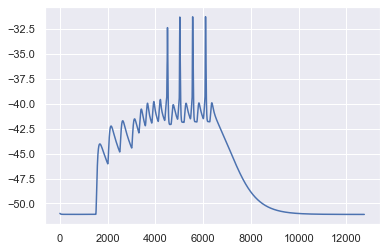

In [16]:
plt.plot(LV3Vsoma[:,23])

Text(0.5, 0.98, 'network 1 at freq 24')

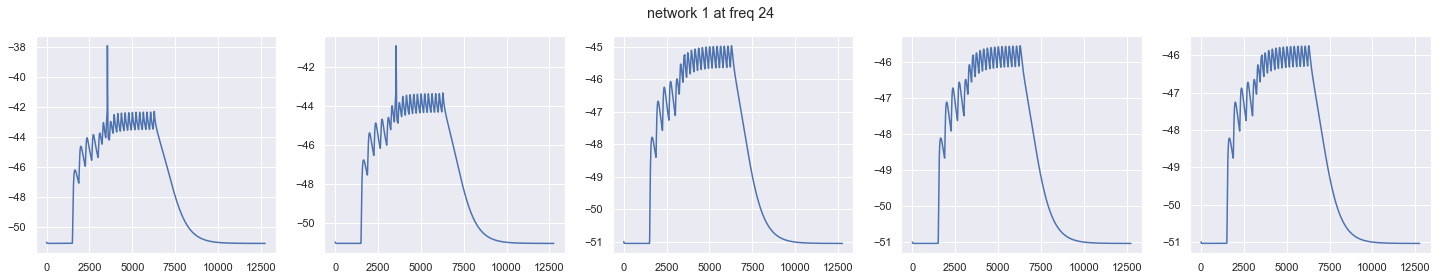

In [22]:
fig,axs = plt.subplots(1,5,figsize=(25,4))
startNo=getNetIDX(1,24)
[axs[i].plot(LV3Vsoma[:,startNo+i]) for i in range(0,len(axs))]
plt.suptitle('network %d at freq %d' %(1,24))

In [31]:
LV3LowAll = np.hstack((LV3ParamsLow,LV3ParamsLowLarge))
LV3codedLowAll = np.hstack((LV3codedLow,LV3codedLowLarge))
LV3RawLowAll= np.hstack((LV3RawLow,LV3RawLowLarge))
LV3passIdxsLowAll= np.hstack((LV3passIdxsLow,LV3passIdxsLowLarge))
paramsLV3PassingLowAll= np.hstack((paramsLV3PassingLow,paramsLV3PassingLowLarge))
totalParamsLV3PassingLowAll= np.hstack((totalParamsLV3PassingLow,totalParamsLV3PassingLowLarge))
SCfreqsPassingAll = np.hstack((SCfreqsLowPassing,SCfreqsLowPassingLarge))


In [19]:
paramsLV3PassingLowLarge.shape

(15, 5840)

from 109 Passing Networks
0.06 uS


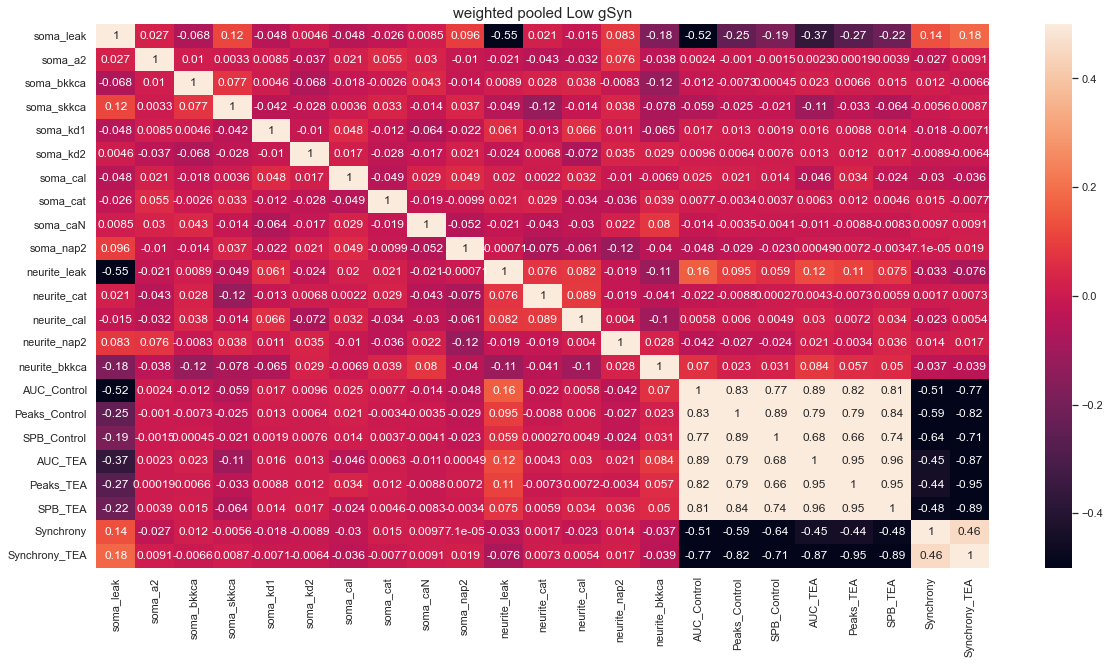

In [6]:
TestpassParams = totalParamsLV3PassingLowAll
TestparamsList = fullParamsList()+LV3CritList()
plotCorrelogram(TestpassParams,TestparamsList,'weighted pooled Low gSyn')
print("from %d Passing Networks" %(int(TestpassParams.shape[1]/80)))
print("0.06 uS")
plt.show()

In [119]:
LV3passIdxsLowLarge

array([  80,   81,   82, ..., 8237, 8238, 8239], dtype=int64)

from 104 Passing Networks
0.06 uS


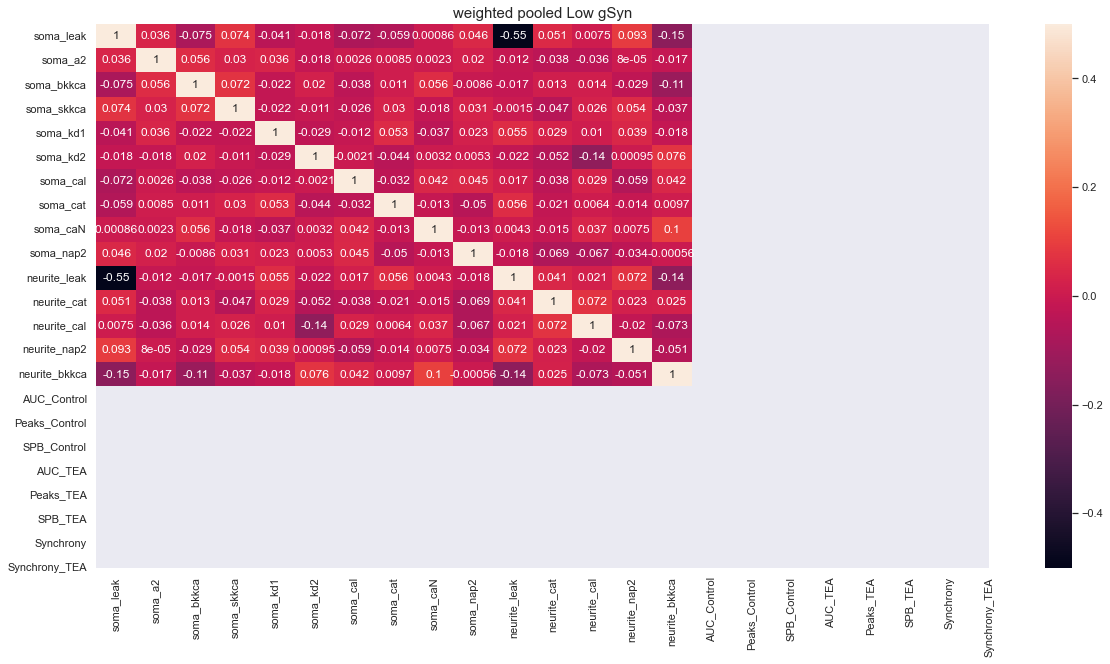

In [122]:


TestpassParams = LV3ParamsLowLarge
TestparamsList = fullParamsList()+LV3CritList()
plotCorrelogram(TestpassParams,TestparamsList,'weighted pooled Low gSyn')
print("from %d Passing Networks" %(int(TestpassParams.shape[1]/80)))
print("0.06 uS")
plt.show()

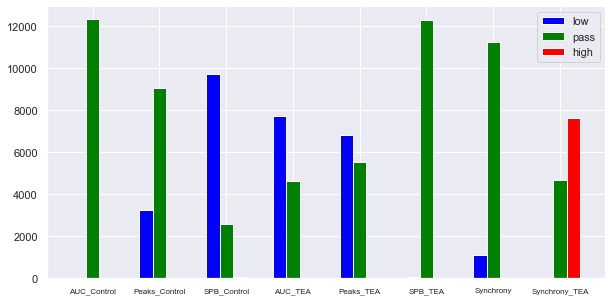

In [9]:
plotFailCrit(LV3codedLowAll,LV3CritList())
plt.show()

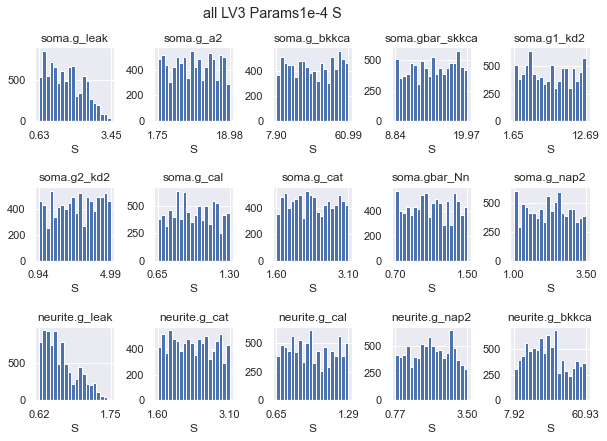

In [10]:
paramsList = list(rangeVarNames().keys())
plotDistributions(totalParamsLV3PassingLowAll,paramsList,20,xlabels='S',title = 'all LV3 Params')

(array([10.,  5.,  5.,  0.,  5., 50., 45., 35., 40., 45., 35., 50., 55.,
        50., 65., 50.]),
 array([26.11205203, 26.44587517, 26.77969831, 27.11352145, 27.44734458,
        27.78116772, 28.11499086, 28.448814  , 28.78263714, 29.11646028,
        29.45028341, 29.78410655, 30.11792969, 30.45175283, 30.78557597,
        31.11939911, 31.45322224]),
 <BarContainer object of 16 artists>)

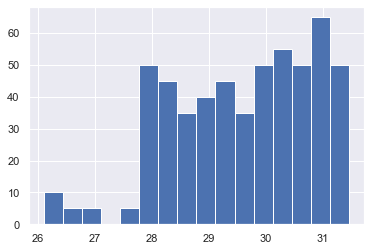

In [48]:
mappedIDxs,freqsnonavgpassing = getRasterData(LV3codedLow,SCfreqsLow)
plt.hist(freqsnonavgpassing,bins=16)

(array([ 20.,   0.,  35.,  15.,  15.,  80.,  70.,  70.,  55.,  80.,  95.,
        100., 100.,  95., 100., 110.]),
 array([26.0055774 , 26.34857783, 26.69157827, 27.0345787 , 27.37757914,
        27.72057957, 28.06358001, 28.40658044, 28.74958088, 29.09258131,
        29.43558174, 29.77858218, 30.12158261, 30.46458305, 30.80758348,
        31.15058392, 31.49358435]),
 <BarContainer object of 16 artists>)

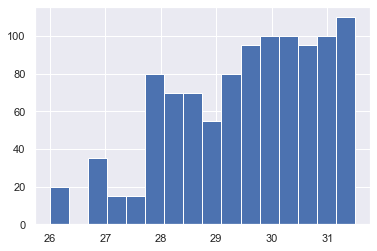

In [50]:
mappedIDxs,freqsnonavgpassing = getRasterData(LV3codedLowLarge,SCfreqsLowLarge)
plt.hist(freqsnonavgpassing,bins=16)


In [37]:
def getRes(paramsPassing):
    var = paramsPassing
    TestpassParams = var
    TestparamsList = fullParamsList()
    CorrRange = [0.1,0.999]
    
    def Report(df,Key):# so we can easily get soma or neurite
        r1 = [True if Key in CorrsDF.loc['conductance1'][i] else False for i in range(len(CorrsDF.loc['conductance1']))]
        r2 = [True if Key in CorrsDF.loc['conductance2'][i] else False for i in range(len(CorrsDF.loc['conductance2']))]
        query = np.logical_and(r1,r2)
        return pd.DataFrame([CorrsDF.loc['conductance1'][query],CorrsDF.loc['conductance2'][query],CorrsDF.loc['Pearsons_R'][query]])
# gets a data frame of all the values on the left lower diagonal which are in the CorrRange of interest 

    TestpassParamsCorr = np.corrcoef(TestpassParams)
    rList,cList,corrVals = [],[],[]
    for i in range(len(TestparamsList)):
        for j in range(len(TestparamsList)):
            if i >= j:#then we are in the right side of the correlogram
                pass
            elif CorrRange[0] < np.abs(TestpassParamsCorr[i][j]) < CorrRange[1]:
                rList.append(TestparamsList[i])
                cList.append(TestparamsList[j])
                corrVals.append(TestpassParamsCorr[i][j])

    CorrsDF = pd.DataFrame(data = [rList,cList,corrVals]).dropna(axis=1)
    CorrsDF.index = ["conductance1","conductance2","Pearsons_R"]

    somaCorrs = Report(CorrsDF,'soma')
    neuriteCorrs = Report(CorrsDF,'neurite')
    somaList = list(somaCorrs.columns)# the column keys so we can drop them to find soma x neurite combos
    neuriteList = list(neuriteCorrs.columns)
    somaXneuriteList =  list(CorrsDF.drop(somaList + neuriteList,axis=1).columns)

    sortedDF = CorrsDF[somaList + neuriteList + somaXneuriteList]
    sortedDFList =  ["soma"]  * sortedDF[somaList].shape[1] +  ["neurite"]  * sortedDF[neuriteList].shape[1] + ["somaXneurite"] * sortedDF[somaXneuriteList].shape[1]

    sortedDF.columns = sortedDFList
    return sortedDF.T

In [41]:
getRes(totalParamsLV3PassingLowAll)

,conductance1,conductance2,Pearsons_R
soma,soma_leak,soma_skkca,0.115112
neurite,neurite_leak,neurite_bkkca,-0.11048
neurite,neurite_cal,neurite_bkkca,-0.100602
somaXneurite,soma_leak,neurite_leak,-0.551742
somaXneurite,soma_leak,neurite_bkkca,-0.178785
somaXneurite,soma_bkkca,neurite_bkkca,-0.123052
somaXneurite,soma_skkca,neurite_cat,-0.124363
somaXneurite,soma_nap2,neurite_nap2,-0.120524


# debugging

In [41]:
someArray  = np.array([3,4,56])
option = 'y'
if option == 'y':
    someArray = np.array([8,1])
someArray

array([8, 1])

In [11]:
#generate a list of folders
myList = [os.path.join("input","LV1"),
 os.path.join("input","LV2"),
 os.path.join("input","LV3"),
 os.path.join("input","LV3","Avg"),
 os.path.join("output","LV1"),
 os.path.join("output","LV2"),
 os.path.join("output","LV3"),
 os.path.join("output","LV3","Avg")
 ]

In [66]:
def makeAvgNets(LV3passParams):#LV3passParamsRepeat in the LV3 output folder is the file that has the parameters of the networks repeated 16 times each
    [a,b] = LV3passParams.shape

    avgNets = np.ones((a,1))

    for i in range(0,b,5*16):
        avgNets = np.hstack((avgNets,np.mean(LV3passParams[:,i:i+5],axis=1).reshape(-1,1)))
    avgNets = avgNets[:,1:]

    avgNets = np.repeat(avgNets,5,axis=1)

    return avgNets

In [71]:

for folder in folderList():
    #move to the folder, and check if it has folders

input
output


In [224]:
myFolders = np.array([["input","output"],
                      ["LV1","LV2","LV3"]
                      
                      ,
                      ["","","Avg"]
                     ],dtype=object)

myFolders

array([list(['input', 'output']), list(['LV1', 'LV2', 'LV3']),
       list(['', '', 'Avg'])], dtype=object)

In [176]:
treebranch = np.arange(0,(myFolders.shape)[0])
treebranch

array([0, 1, 2])

In [220]:
lvls = []

for j in range(len(myFolders[0])):
    for i in range(len(myFolders[1])):
        if myFolders[2][i] == "":
            path = os.path.join(myFolders[0][j],myFolders[1][i])
        else:
            path = os.path.join(myFolders[0][j],myFolders[1][i],myFolders[2][i])
        print(path)

input\LV1
input\LV2
input\LV3\Avg
output\LV1
output\LV2
output\LV3\Avg


In [227]:
def mkTrunk(myFolders):
    for folder in myFolders[0]:
        print(os.path.join(folder))#mkdir

In [319]:
def mkBranch(myFolders,trunk,branch):
    for i in range(len(myFolders[branch])):
        if myFolders[branch][i] == "":
            a=1
        else:
            print(os.path.join(trunk,myFolders[branch][i]))

In [225]:
mkTrunk(myFolders)

input
output


In [320]:
trunk = 1
branch=2
trunks = np.arange(0,(myFolders.shape)[0]-1)
branches = np.arange(0,(myFolders.shape)[0])

for i in range(len(myFolders[trunk])):
    mkBranch(myFolders,myFolders[trunk][i],branch)

LV1\Avg
LV2\Avg
LV3\Avg


In [270]:
branches = np.arange(0,(myFolders.shape)[0])
for branch in branches:
    
    

0
1
2


In [213]:
def mkLevel(myFolders,level):
    lvl = []
    for j in range(len(myFolders[level])):
        lvl.append(os.path.join(myFolders[level][j]))
    return lvl

In [214]:
lvl = []
for i in range(len(myFolders)):
    print(i)
    
    lvl.append(mkLevel(myFolders,i))

0
1
2


In [215]:
lvl

[['input', 'output', ''], ['LV1', 'LV2', 'LV3'], ['', '', 'Avg']]

In [325]:
avgN = makeAvgNets(getEveryFirstNet(LV3passParams))

In [78]:
VsomaControl = np.load(os.path.join(archivedPath,"output","LV2","VsomaControl.pkl.npy"),allow_pickle=True).T
VsomaTEA = np.load(os.path.join(archivedPath,"output","LV2","VsomaTEA.pkl.npy"),allow_pickle=True).T
LV2RejectionResults = np.loadtxt(os.path.join(archivedPath,"output","LV2","LV2RejectionResults.txt"))

In [20]:
Vsoma = np.array(pd.read_pickle(os.path.join(archivedPath,"output","LV1","Vsoma.pkl"))).T
LV1RejectionResults = np.loadtxt(os.path.join(archivedPath,"output","LV1","LV1RejectionResults.txt"))

In [30]:
passIdxs = np.where(np.array([1 if np.all(LV1RejectionResults[:,i] ==1) else 0 for i in range(LV1RejectionResults.shape[1])]))[0]
len(passIdxs)

5751

In [32]:
LV1PassVoltages = Vsoma[:,passIdxs]
Time = getSimTime(LV1PassVoltages[:,0],0.2)

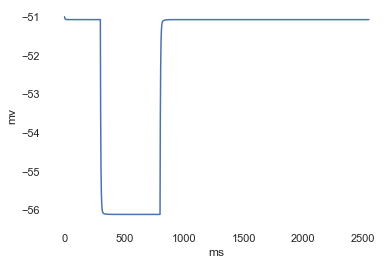

In [33]:
fig, axs = plt.subplots()
axs.set_facecolor("white")
plt.plot(Time,LV1PassVoltages[:,0])
plt.grid=False
plt.xlabel('ms')
plt.ylabel('mv')
plt.savefig('model LV2 TEA Passing.png',dpi=500)